# Introduction to Data Science and Systems 2023-2024<small><small>v20232024a</small></small>
## Lab 1: Computational Linear Algebra
#### - ***you should submit the completed notebook to Moodle along with one pdf file (see the end of the notebook and Moodle for instructions)***

#### University of Glasgow, JHW, NP & ZM, 2023-2024

## Guide

Lab 1 is structured as follows (with two main task sections):

>-    **Intro: A whisky dataset** 
>-    **Task A: Norms, interpolation and statistics**
>-    **Task B: Eigenvectors and PCA**
>-    **Task C: System of linear equations**
>-    **Appendix: Marking Summary (and additional metadata)**

You will need to understand the following functions well to complete this lab:
* [`np.argmin()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html) [Self-study]
* [`np.argsort()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argsort.html) [Self-study]
* [`np.linalg.norm()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) [Week 2]
* [`np.linalg.svd()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html) [Week 3]
* [`np.linalg.eig()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.eig.html) [Week 3]
* [`np.cov()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cov.html) [Week 2]
* [`np.linalg.pinv()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.pinv.html) [Week 3]


We recommend you read through the lab *carefully* and work through the tasks one by one.

#### Material and resources 
- It is recommended to keep the lecture notes (from lecture 1-2) open while doing this lab exercise. 
- If you are stuck, the following resources are very helpful:
 * [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
 * [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
 * [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

#### Marking and Feedback
This assessed lab is marked using two different techniques;

- Autograded with feedback; you'll get immediate feedback.
- Autograded without (immediate) feedback (there will always be a small demo/test so you can be confident that the format of your answer is correct).

*Note*: auto-graded results are always provisional and subject to change in case there are significant issues (this will be in favor of the student).

#### Help \& Assistance
- This lab is graded and the lab assistants/lecturer can provide guidance but we can (and will) not give you the final answer or confirm your result.

#### Plagiarism
- All submissions will be automatically compared against each other so make sure your submission represents an independent piece of work! We have provided a few checks to make sure that is indeed the case.

#### Important
- Follow all instructions precisely
- Some cells are read-only, that's on purpose!
- do not duplicate any cell! Only use the existing cells for your code. 

---

# Before you begin

Please update the tools we use for the automated greading by running the below command (uncomment) and restart your kernel (and then comment again) -- or simply perform the installation externally in an Anaconda/Python prompt.

In [1]:
!pip install -U --force-reinstall --no-cache https://github.com/johnhw/jhwutils/zipball/master

# the following will allow you to downlad the data files you need (that are otherwise in the zip file)
# you can comment this line after the first run.
try:
  from whisky_map import draw_map, map_box
except:
  !pip install wget
  !wget -O ./data.zip https://raw.githubusercontent.com/mengzaiqiao/idss2023/main/data.zip
  !unzip data.zip
  !wget https://raw.githubusercontent.com/mengzaiqiao/idss2023/main/whisky_map.py

  Preparing metadata (setup.py) ... done
  Created wheel for jhwutils: filename=jhwutils-1.1-py3-none-any.whl size=35065 sha256=2201d79026e5eede478db013c129ea6cf1b7266f0818f74e8e2de1af21f25cbe
  Stored in directory: /private/var/folders/p7/6vf9gsks0hx17q4259m6s9640000gn/T/pip-ephem-wheel-cache-5n6z188r/wheels/a8/e7/e3/9542f8e4159ba644c6acd9f78babbe8489bb72667fb02ac54d
Successfully built jhwutils
  Attempting uninstall: jhwutils
    Found existing installation: jhwutils 1.1
    Uninstalling jhwutils-1.1:
      Successfully uninstalled jhwutils-1.1


Let's import some useful Python packages and define a few custom functions...

In [2]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy
import scipy.stats 
import os
import sys
import binascii
from unittest.mock import patch
from uuid import getnode as get_mac

from jhwutils.checkarr import array_hash, check_hash, check_scalar, check_string
import jhwutils.image_audio as ia
import jhwutils.tick as tick

version_id = "v20232024a"

###
tick.reset_marks()

# special hash funciton
def case_crc(s, verbose=True):
    h_crc = binascii.crc32(bytes(s.lower(), 'ascii'))
    if verbose:
        print(h_crc)
    return h_crc

# this command generaties a unique key for your system/computer/account
uuid_simple = (("%s") % get_mac())
uuid_str = ("%s\n%s\n%s\n%s\n%s\n") % (os.path,sys.path,sys.version,sys.version_info,get_mac())
uuid_system = case_crc(uuid_str,verbose=False) 


# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)
np.random.seed(2021)

# You can ignore this
import lzma, base64
exec(lzma.decompress(base64.b64decode(b'/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AuQBIRdADSbSme4Ujxz95HdWLf4m39SX9b5yuqRd8UVk3DwULgMdEb8P1bLvis2Swz3hlDU+FwGvQQSXUZEv0GMy+ErARv0E4TRCmTvFyQ5JSb/G7uf1mJI1cRyyqS/p8OjxfizueERZipJkqifEM7mgPLl2o+B4OX/p+0Vu3LfTMRZvY//6V0JXZwRxDGVuddVdlsZOuNDNEzsXiiyo2fiXL31w0sXabfigUkJ4q1uo4W7C0THX7Lhb0zVk9A0/+f114CeChR9Gz25xOstbGjOodl1SDpP5rKIxkxZTzcjw65yJRKqid46CTa5ffWK7y9QtygL7IqcGB9ode3TKcTh57Edd9+wylW9BiSE8/qh/93qFavlXK1sjLdoTWEfPZ96HOR6La9g8KEEFNNMAc+7HtTv1JwoX8w+zLayLzdpIqA+HLAVFiVeFg4jPu8imDtmoOhe66WDgPWsXetR6FFCK7mw4q4Q+A4TCz6ugUoh/gIEGjIadianBQVSST062b8vSLzWmFYLKJoRPDHPyvFWKX5u27LZ9Bpswls2feqW6SBEvavwjckRwW5r4Fc6F+MEYgZmAUy8sJRXe7JHvp6LZ3o5RM92eQRoGsDeL82U2LC6sXfxy3MBj6Gd0wwWC9iJdyvs+laSdI41jk2lZUcDpVCBoSV/Zr+0rH1PsT33u2NlfDsaXrG67zKhbB+SSGz3OoN6Kq/1GwWf+GvNH3cySyrJOgN2edwh/fn87XMHk5QZCg0BtZRObATtZAoloB5jJGvjwqtxHCItkTdGoUi4TY75N3FMTPowFYUXn2tjAtngJibqtGbZ/+PaS7E134Lsvxy5o2uaBgoV+U9Mg1poz1QAl0YTKDNMZjVILDbKIRq9e2C4X6e3SWQRW4LrBujBJp7Q8AJjKIspFOLt7PzxOwkSHES90iNgMW4Sn+uTKwQEcTrtTZCDm5Bynn5taepEXp2hj2cmuZEGJCXX8HOM9RgnWyeOVDcUPRCGAGrjA3y7VZGuEjdPE4DT32dmqJabHrPtrc0tgde5UfefS8ezzGOEheOmYQEtpIZLY2TwuNbhOIvIxNfnDA7H7ug1LtCSTejYkGU9CztGzKkyoWEMSTGQSd7aEddrdDS8gsOF6r+RmhCutjGejXFHFtVEcL8FJxczfLdbWDNdBl69IrZ8vlV6Ts4FojBO0/w6HAv24jyX1r+4n3ymPeJZb2SR7HQ/4L2In4ywuUdCkI2t2UuB0fHYgA+ibCVPoXg5Da698PlcozIlD/cmP+3OAnEU+yPElHmLrfjGLFwmWN28ikbluPx0be9B7sn4qTJUY0zrOBuv+wS47A7j5XXicpakCHJcqDaEuzWCa6e1JRmIDoitnr+2kNbGDYNPgKKJE8XDvWVZTgnG1NCGhTZJlTL37hZZIuwkA5RbpnOlrEldKjGnol9D209OuritES1GvlL2H7lDtRTiMnHPHcHMnVqPg5usk3F2Zw23PtC1YDaHvqxgyqaXlRslElFtLz2k9GV2QC3bUxVVlf6jQgPkDoQhKu63JjQtoPRrn0AAR37PsnsFZ74AAaAJkRcAAHaUzMuxxGf7AgAAAAAEWVo=')).decode('ascii'))
print("Everything imported OK (ignore deprecated warnings)")


Everything imported OK (ignore deprecated warnings)


In [3]:
# Hidden cell for utils needed when grading (you can/should not edit this)

---


**Mini-task**: provide your personal details in two variables:

* `student_id` : a string containing your student id (e.g. "1234567x"), must be 8 chars long.
* `student_typewritten_signature`: a string with your name (e.g. "Adam Smith") which serves as a declaration that this is your own work (read the declaration of originality when you submit on Moodle).*

In [4]:
student_id = "2856883J" # your 8 char student id
student_typewritten_signature = "Philip Niraj Joseph" # your full name, avoid special chars if possible

# YOUR CODE HERE


In [5]:
## We will print your info to a pdf file at the end of the notebook - 
# including the Declaration of Originality - which must be uploaded alongside 
# the actual notebook  you should also see two green checkmarks [0 marks] 
# indicating that your info meet the basic std)

with tick.marks(0): # you don't get any credit for remembering your student id. This is just a test!
    assert(len(student_id)==8)

with tick.marks(0):  # you don't get any credit for remembering your own name! This is just a test!
    assert(len(student_typewritten_signature)>0)

# for redundancy (if the PDF did not generate properly)
print(
    "STUDENT_ID:=[{sid}|{name}]".format(
        sid=student_id, name=student_typewritten_signature
    )
)

STUDENT_ID:=[2856883J|Philip Niraj Joseph]


## Introduction
## Whisky: Representing and comparing vectors

Whisky distillation is a major industry in Scotland. 

<img src="imgs/stills.jpg"> <br><br>*.[Image](https://flickr.com/photos/sashafatcat/518104633 "stills") by [sashafatcat](https://flickr.com/people/sashafatcat) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)*

The dataset in `data/whisky.csv` is data from a number of whisky distilleries. For each distillery, there is a set of subjective judgements about the flavour characteristics of their product. The data comes from [this Strathclyde University research project](https://www.mathstat.strath.ac.uk/outreach/nessie/nessie_whisky.html).

Each distillery has been judged on twelve flavour indicators (like "smokiness" or "sweetness"), and they have been assigned values from 0-4, indicating the strength of that category as judged by an expert whisky drinker. These can be seen as 12D vectors, one vector per distillery. **Every distillery is represented as a point in twelve dimensional vector space.**

We also have a 2D array of the geographical locations of each distillery. The code below loads the data.

## Loading the data

In [6]:
## It is not necessary to understand this code to complete the exercise. 
import pandas as pd

whisky_df = pd.read_csv("data/whiskies.txt")
whisky_df = whisky_df.sort_values(by="Distillery")
# extract the column and row names
distilleries = np.array(whisky_df["Distillery"])

columns = {name.lower(): index for index, name in enumerate(whisky_df.columns[2:-3])}

# split apart the data frame and form numpy arrays
locations = np.array(whisky_df.iloc[:, -2:])
whisky = np.array(whisky_df.iloc[:, 2:-3])

# fix wine column which is misnamed
columns["wine"] = columns["winey"]
del columns["winey"]
# force tie breaks
np.random.seed(2018)
whisky = whisky + np.random.normal(0, 0.1, whisky.shape)

## Viewing the data

We can see this whole dataset as a heatmap:

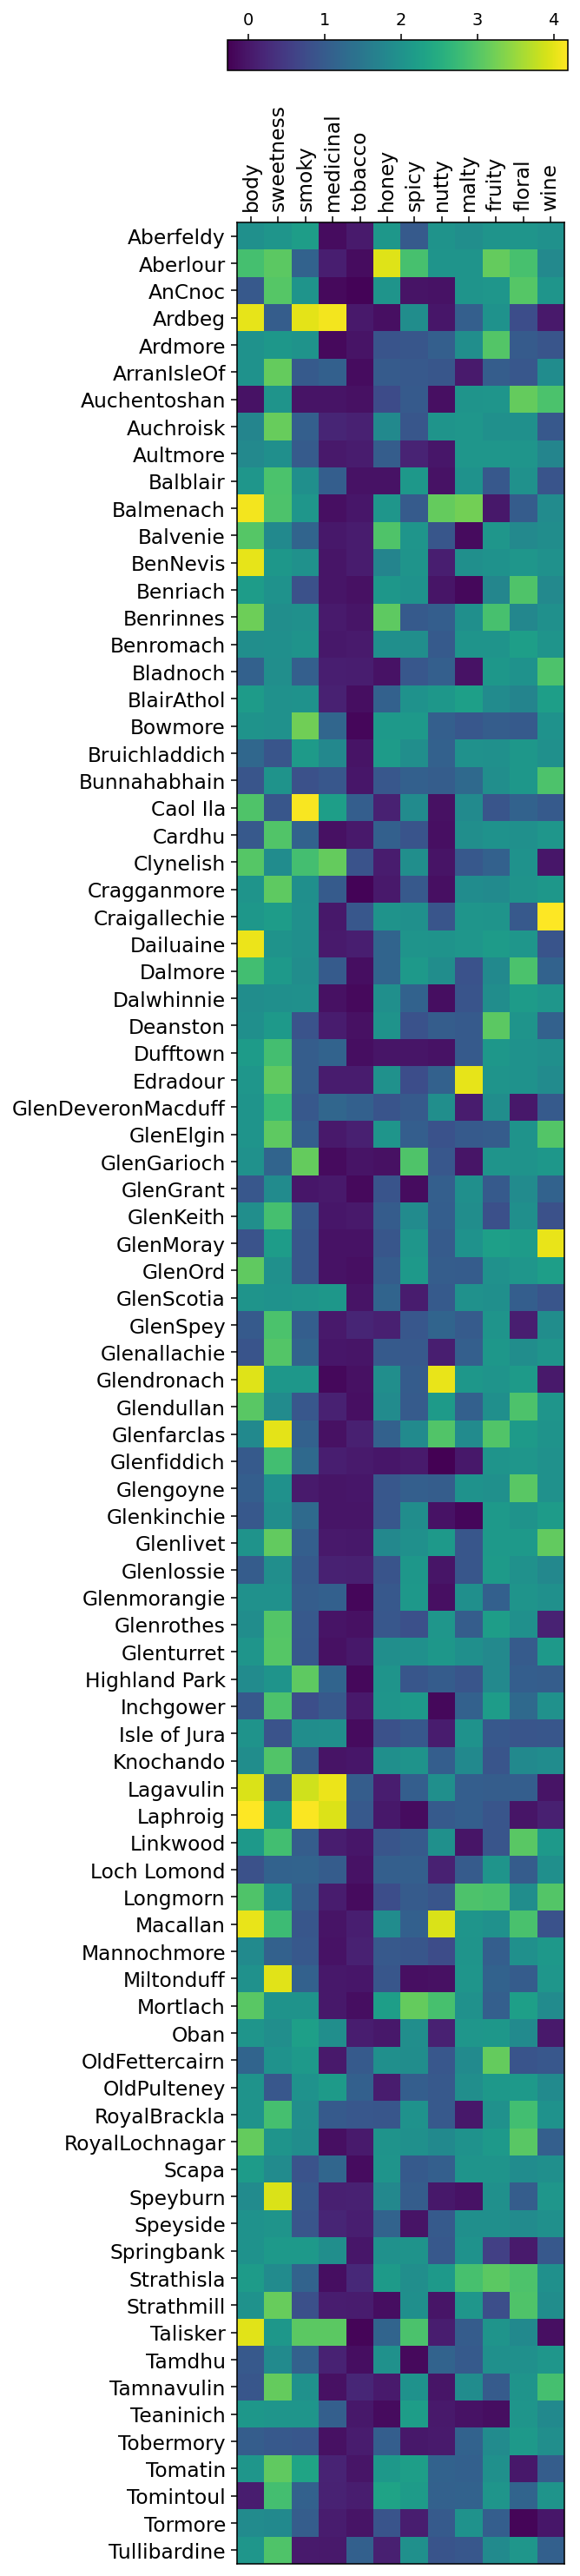

In [7]:
# show a plot of the whisky data
fig = plt.figure(figsize=(10,25))
ax = fig.add_subplot(1,1,1)

# image plot
img = ax.imshow(whisky)
ax.set_yticks(np.arange(len(distilleries)))
ax.set_yticklabels(distilleries, rotation="horizontal", fontsize=12)

# put the x axis at the top
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)

# some horrific colorbar hackery to put in the right place
# don't worry about this bit!
cbaxes = fig.add_axes([0.37, 0.93, 0.28, 0.01])  
fig.colorbar(img, orientation='horizontal',  cax=cbaxes, ticks=np.arange(5))
cbaxes.xaxis.tick_top()

### Available data
You now have these variables:

* `whisky` an  86x12 array of taste judgements, one row for each of the 86 distilleries. Each whisky has a rating 0-4 for each of the 12 flavour categories.
* `distilleries` is a list of 86 distillery names
* `columns` is a mapping of feature names to column indices.
* `locations` is an 86x2 matrix of positions of each distillery in [OS grid reference format](https://www.gridreferencefinder.com/) in the same order as `whisky`

For example:

In [8]:
print(whisky[distilleries.searchsorted('Glenfiddich'), 
             columns['smoky']])

1.2551637969677651


will tell you how "smoky" Glenfiddich was rated.

In [9]:
print(distilleries[8]) # distilleries is just a list of names

Aultmore


will tell you the 9th distillery in the dataset is `Aultmore`.

In [10]:
print(locations[distilleries.searchsorted('Glengoyne')])

[252810 682750]


will tell you where to find the Glengoyne distillery in UK OS grid units.

----

## Task A: Norms, interpolation and statistics
We will see some simple things we can do with this dataset. 


We can compute distances in **flavour space** between distilleries.

For example, we can compute the distance between the `Lagavulin` distillery and every other distillery *in terms of flavour, not physical distance*. The result will be a 1D array of 86 distances. 

Remember: distance between $\vec{x}$ and $\vec{y}$ is the norm of their difference: $\|\vec{x}-\vec{y}\|$

We can compute this for several different norms (e.g. $L_1, L_2$, and $L_\infty$)

We start by subtracting the flavour vector for `Lagavulin` from all the other flavour vectors in the `whisky` matrix.

We then use `np.linalg.norm` to compute the norm of every row vector in the resulting matrix. We set `axis=1` to ensure that norms are calculated "across columns", i.e. the norm of each row vector is calculated. We also specify which norm we want to calculate (`1` for $L_1$, `2` for $L_2$ or `np.inf` for $L_\infty$). The result is a 1D array of 86 distances in **flavour space**.

In [11]:
# Get the flavour vector for Lagavulin
lagavulin = whisky[distilleries.searchsorted("Lagavulin")]
print(lagavulin)

[ 3.93030065  1.07246333  3.85958392  4.04846609  1.04915351  0.09697488
  1.06773007  1.93996331  1.05945416  1.05017317  1.06749244 -0.027137  ]


In [12]:
## Compute distances
# must use axis=1 to get the right result, otherwise the matrix norm will be used
# (the matrix norm is calculated across the whole matrix, rather than across each row vector!)
lagavulin_1 = np.linalg.norm(whisky - lagavulin, 1, axis=1)  # L_1
lagavulin_2 = np.linalg.norm(whisky - lagavulin, 2, axis=1)  # L_2
lagavulin_inf = np.linalg.norm(whisky - lagavulin, np.inf, axis=1)  # L_inf

### Visualising these distances
We can visualise these distances. This lets us see which distilleries produce whisky most similar to Lagavulin and which of them are most dissimilar. Note that we can use `argsort` to order a list of distances. Below, we plot a faceted graph, one facet for each norm, showing each distillery's flavour distance to `Lagavulin` as a rank bar plot (see Unit 3). The labels are a bit small, but the graphs are a useful summary of the distances in this abstract 12 dimensional space.

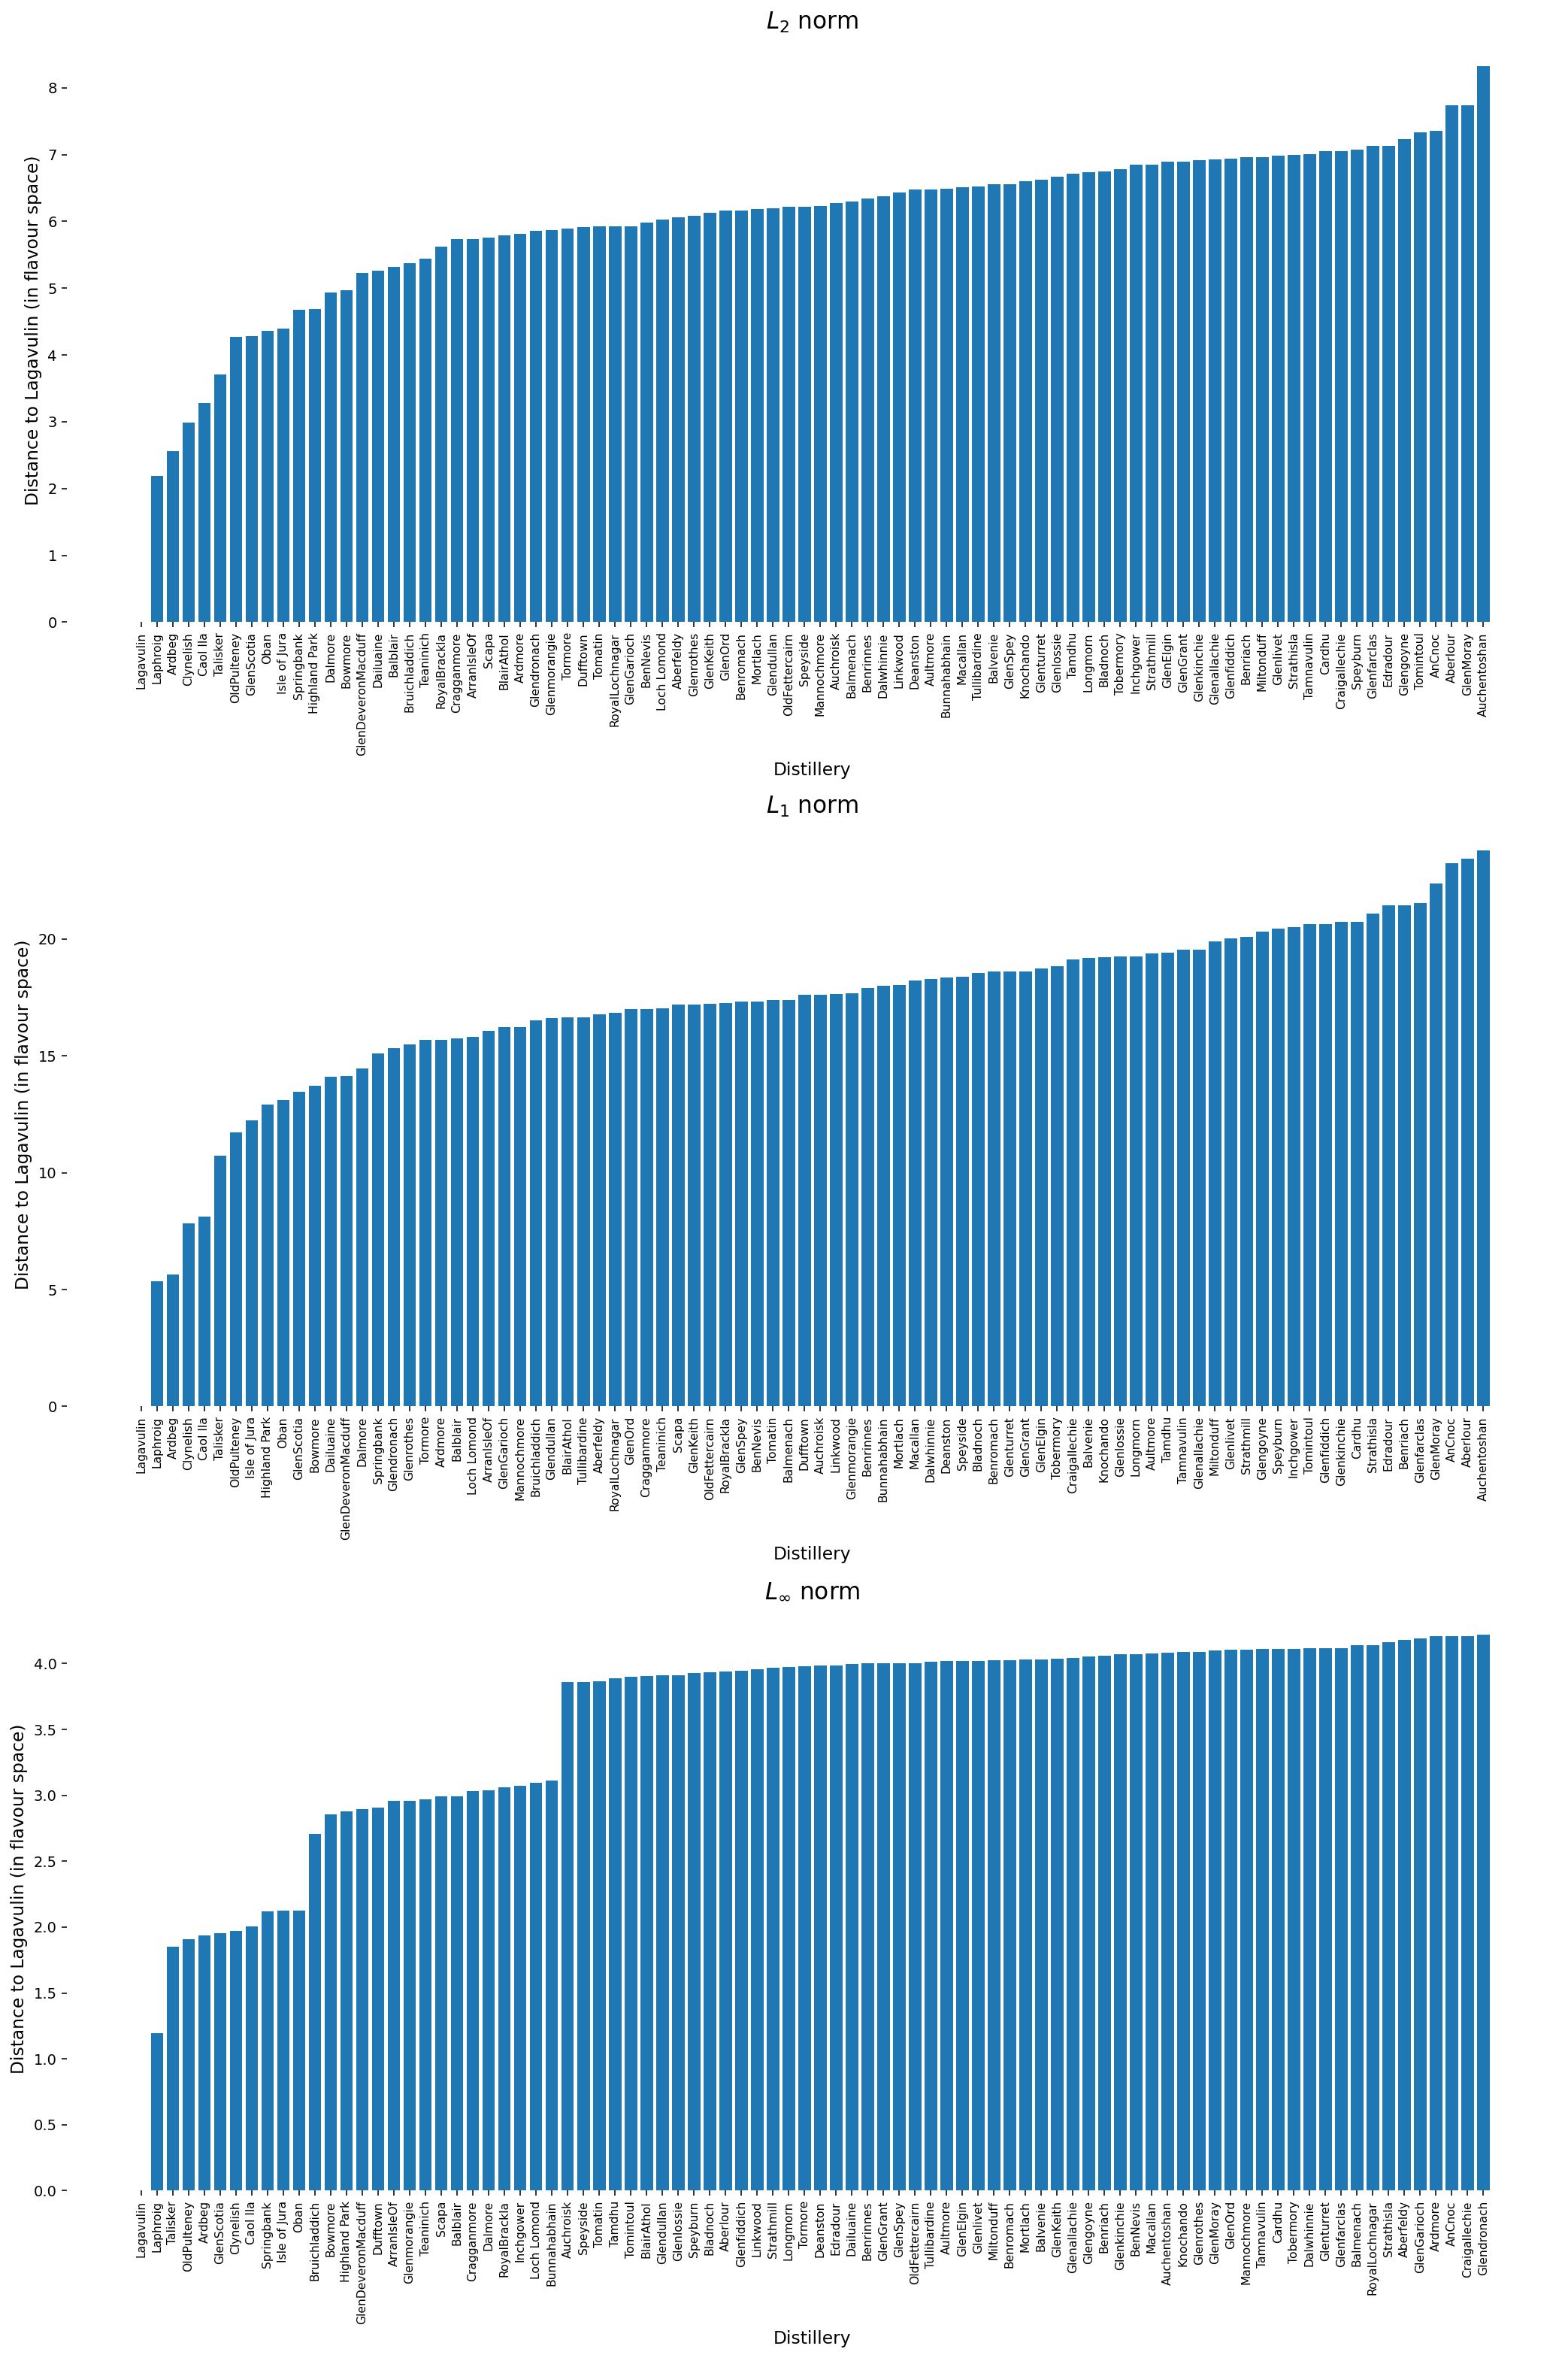

In [13]:
fig = plt.figure(figsize=(15, 22.5))

# you can use this utility function to
# help you get the xticklabels in order
def list_in_order(alist, order):
    """Given a list 'alist' and a list of indices 'order'
    returns the list in the order given by the indices"""
    return [alist[i] for i in order]


def rank_plot(distances):
    # find the ordering of the distances
    order = np.argsort(distances)
    # bar plot them
    ax.bar(np.arange(len(distances)), distances[order])
    ax.set_xlabel("Distillery", fontsize=12)
    ax.set_ylabel("Distance to Lagavulin (in flavour space)", fontsize=12)
    ax.set_xticks(np.arange(86))
    ax.set_frame_on(False)
    # make sure the same order is used for the labels!
    ax.set_xticklabels(
        list_in_order(distilleries, order), rotation="vertical", fontsize=8
    )


# make the plots
ax = fig.add_subplot(3, 1, 1)
ax.set_title("$L_2$ norm", fontsize=16)
rank_plot(lagavulin_2)
ax = fig.add_subplot(3, 1, 2)
ax.set_title("$L_1$ norm", fontsize=16)
rank_plot(lagavulin_1)
ax = fig.add_subplot(3, 1, 3)
ax.set_title("$L_\infty$ norm", fontsize=16)
rank_plot(lagavulin_inf)

# removes ugly overlapping
plt.tight_layout()

**Task A.1** 

Compute the $L_2$ distance between Lagavulin and Talisker's flavour profiles. 
- Store in a variable called `lagavulin_talisker`

In [14]:
# YOUR CODE HERE
lagavulin_talisker = np.linalg.norm(whisky[distilleries.searchsorted("Lagavulin")] - whisky[distilleries.searchsorted("Talisker")])
# raise NotImplementedError()

In [15]:
with tick.marks(2):        
    assert(check_hash(lagavulin_talisker, ((), 18.550803550591446)))

**Task A.2** 
Which distillery is closest to Ardbeg's flavour profile in the $L_\infty$ norm? Store the distillery **name** in the variable in `like_ardbeg`. Note: compute this - do not hardcode it.


In [16]:
# YOUR CODE HERE
# Get flavour profile for Ardbeg
ardbeg_coordinates = whisky[distilleries.searchsorted("Ardbeg")]

# Compute L∞ norm distances for all distilleries
max_distances = np.linalg.norm(whisky - ardbeg_coordinates, np.inf, axis=1)
#without this the code returns closest ditellery as Ardbeg itself, so we hard code it to a high value
max_distances[distilleries.searchsorted("Ardbeg")] = np.inf 

# Find the index of the closest distillery in L∞ norm
closest_distillery_index = np.argmin(max_distances)

# Get the name of the closest distillery
like_ardbeg=distilleries[closest_distillery_index]

# raise NotImplementedError()

In [17]:
print("The distillery most like Ardbeg (according to the L_inf norm) is {distillery}.".
          format(distillery=like_ardbeg ))

The distillery most like Ardbeg (according to the L_inf norm) is Clynelish.


In [18]:
with tick.marks(2):        
    assert(case_crc(like_ardbeg)==1878156447)

1878156447


Which distillery is *geographically furthest* from Ardbeg (using L_2 norm)?

In [19]:
# YOUR CODE HERE

# Get geographical coordinates for Ardbeg
ardbeg_coordinates = locations[distilleries.searchsorted("Ardbeg")]

l2_distances = np.linalg.norm(locations - ardbeg_coordinates, axis=1)

furthest_distillery_index = np.argmax(l2_distances)

furthest_ardbeg = distilleries[furthest_distillery_index]
# raise NotImplementedError()

In [20]:
# Sanity check. Validate that furthest_ardbeg is a str. 
# This test needs to pass for the hidden test to run correctly.
with tick.marks(0):        
    assert(type(furthest_ardbeg)==str)

In [21]:
# Hidden test checking furthest_ardbeg [3 marks]

**Note** from now on, use the $L_2$ norm if you need to compute any norms.


### Vector arithmetic
A client says to you:
    
>    I'd like something a bit more "mellow" than Tormore, in the same way that Glenmorangie is more "mellow" than Bowmore.

Which whisky should you recommend? 

We can work this out:
* What does more "mellow" mean? We don't have a "mellow" column.
    * But we do have a reference point: Bowmore -> Glenmorangie is somehow "mellow"
    * This "direction" between these flavour vectors is *also* a vector
* How do we combine Tormore's flavour profile with "mellow"? We can compose vectors by addition.
* How do we find a distillery that represents this profile? We can compute lengths of vectors using a norm.

**Task A.3** Compute:
* `mellow` A vector representing what "mellow" is.
* `hypothetical_flavour` A vector representing a hypothetical flavour that would be a more mellow version of Tormore.
* `recommendation` the name of a specific distillery that we might recommend, as a string.

**Note: this question is not subjective, nor does it require any trial-and-error or knowledge about whisky. Answer it directly using vector arithmetic.**

In [22]:
# YOUR CODE HERE
#first we calculate the mellow vector using Bowmore and Glenmorangie as a reference
bowmore_coordinates = whisky[distilleries.searchsorted("Bowmore")]
glenmorangie_coordinates = whisky[distilleries.searchsorted("Glenmorangie")]
mellow = glenmorangie_coordinates-bowmore_coordinates

#we now add this mellow vector to Tormore's coordinates to get the hypothetical_flavour
tormore_coordinates = whisky[distilleries.searchsorted("Tormore")]
hypothetical_flavour = tormore_coordinates + mellow

# calculate the L2 distances between the hypothetical flavour and all other distilleries
l2_distances = np.linalg.norm(whisky - hypothetical_flavour, axis=1)

#recommendation is now calculated as the min of L2 distances
recommendation = distilleries[np.argmin(l2_distances)]

# raise NotImplementedError()

In [23]:
print("I would recommend {distillery} as a more 'mellow' version of Tormore.".format(distillery=recommendation))

I would recommend GlenGrant as a more 'mellow' version of Tormore.


In [24]:
with tick.marks(3):
    assert(check_hash(mellow, ((12,), -3.374787460507174)))

In [25]:
with tick.marks(4):
    assert(check_hash(hypothetical_flavour,((12,), 49.63291973521592)))

In [26]:
# Sanity check. Validate that furthest_ardbeg is a str. 
# This test needs to pass for the hidden test to run correctly.
with tick.marks(0):        
    assert(type(recommendation)==str)

In [27]:
# Hidden test checking recommendation [4 marks]

**Task A.4** A client wishes to taste whiskies than span a spectrum of flavours. You have been told:

* `Lagavulin` represents one end of this spectrum
* `Auchentoshan` represents the other end of this spectrum.

Find a sequence of *six* distilleries, as evenly spaced across this spectrum as possible. Store the names in a list `tour`, which should begin "Lagavulin" and end in "Auchentoshan".

In [28]:
# YOUR CODE HERE

#find coordinates for both distelleries

lagavulin_coordinates = whisky[distilleries.searchsorted("Lagavulin")]
auchentoshan_coordinates = whisky[distilleries.searchsorted("Auchentoshan")]

n = 6 #number of distelleries

#using linear interpolation 
interpol_coordinates = np.linspace(lagavulin_coordinates, auchentoshan_coordinates, n)

#getting the closest distelleries to the interpolated coordinates
closest_dist = [np.argmin(np.linalg.norm(whisky - x, axis=1)) for x in interpol_coordinates]

tour = [distilleries[i] for i in closest_dist]

# raise NotImplementedError()

In [29]:
print("The recommended flavour tour from Lagavulin to Auchentoshan is:")

for distillery in tour:
    print("\t", distillery)

The recommended flavour tour from Lagavulin to Auchentoshan is:
	 Lagavulin
	 Lagavulin
	 OldPulteney
	 OldPulteney
	 Bunnahabhain
	 Auchentoshan


In [30]:
# test the first three items on the list

with tick.marks(3):
    assert(case_crc(tour[0])==3089990555)
    assert(case_crc(tour[1])==3089990555)
    assert(case_crc(tour[2])==2088351511)        


3089990555
3089990555
2088351511


In [31]:
# A hidden test that tests the last three items in the list (3 marks)
# Note: You need to ensure that tour[3] and tour[4] contain the correct answers.


## Region flavours

We could say that the "representative" element of a collection of vectors was the one closest to the geometric centroid. This is given by the **mean vector** of a data set (computed below).

**Task A.5** Compute the mean vector of all of the flavour vectors. Use it to find the names of two distilleries:
* `most_representative` The distillery with the **most** representative flavour profile
* `least_representative` The distillery with the **least** representative flavour profile

In [32]:
mean_vector = np.mean(whisky, axis=0)

In [33]:
# YOUR CODE HERE
#calculate norm distances from mean vector
l2_distances_meanvector = np.linalg.norm(whisky - mean_vector, axis=1)

#most representative would be the least distant from mean and vice versa

most_representative = distilleries[np.argmin(l2_distances_meanvector)]
least_representative = distilleries[np.argmax(l2_distances_meanvector)]

# raise NotImplementedError()

In [34]:
print("The most representative whisky distillery is {most}, and the most unusual is {least}.".format(most=most_representative,
                                                                                           least=least_representative))

The most representative whisky distillery is Benromach, and the most unusual is Laphroig.


In [35]:
with tick.marks(3):
    assert(case_crc(most_representative)==125187962)    

125187962


In [36]:
# Hidden test checking least_representative [3 marks]
# Note: Make sure type(least_representative) is str


### A map
The code below will show a map of Scotland, with the distilleries in their correct positions. Different geographic regions have different characteristic flavour profiles.

One very distinctive region is the **island** region. This is a region bounded roughly by the box

    95000, 625000 -> 183000, 860000
    
in the same OS grid units used in the `locations` array. This is highlighted on the map below.


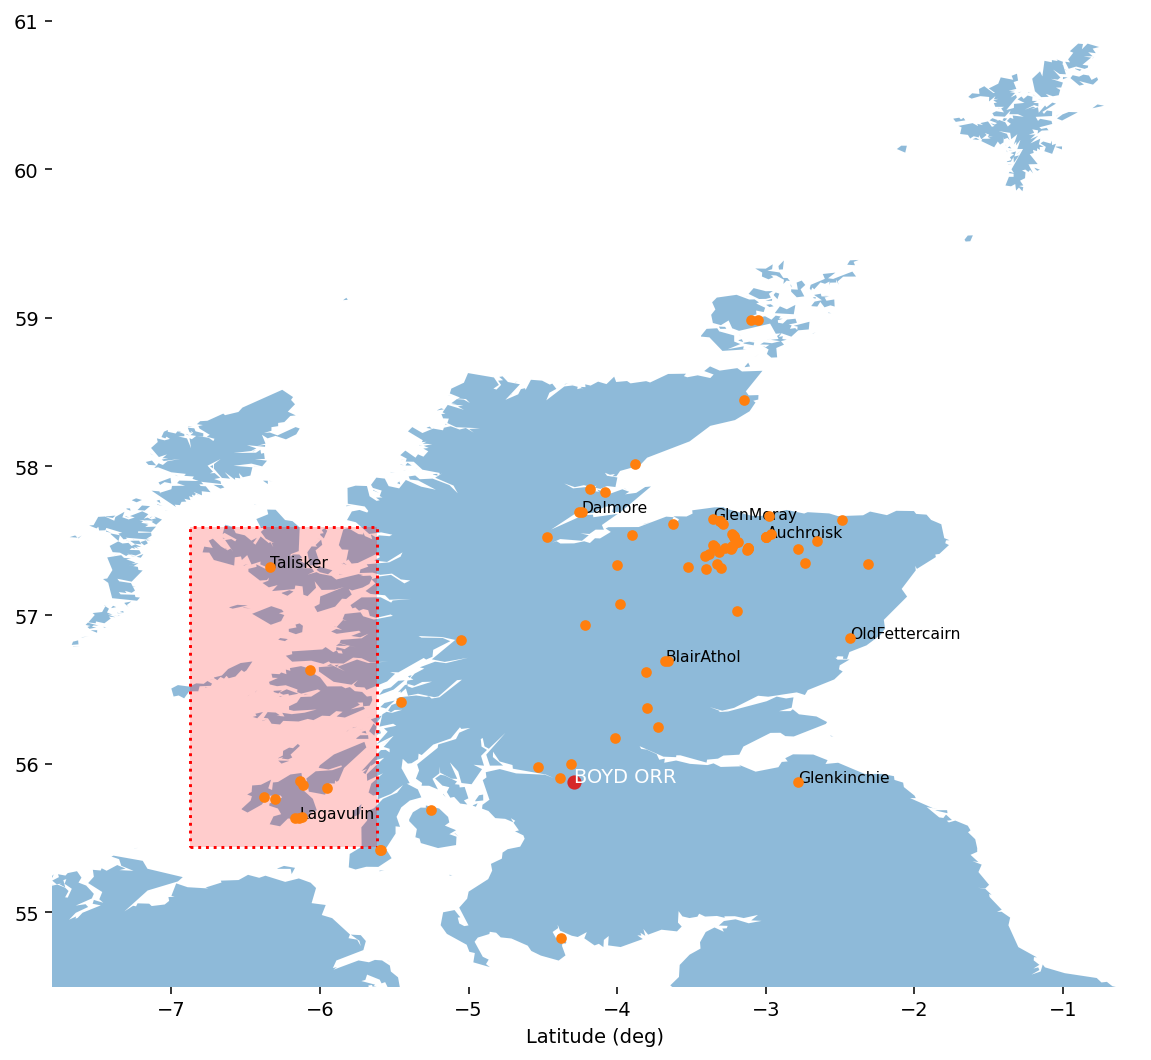

In [37]:
from whisky_map import draw_map, map_box

# draw each distillery label at the locations given.
ax = draw_map(locations, distilleries)

# show the island region
# draw a box in OS grid units
map_box(ax, 95000, 625000, 183000, 860000)

**Task A.6**
* Find all distilleries in island and use this to answer these questions:
* `island_flavour`: Compute the most typical whisky flavour profile for island whiskies. (i.e. a 12 element vector).
* `most_typical_island`: The specific name of the distillery from the islands that is most typical of that region;
* `most_atypical_island`: The specific name of the distillery from the islands that is most atypical of that region (i.e. furthest from the typical);
* `most_typical_non_island`: The specific name of the distillery from **outside** island that is most typical of that region;
* `most_like_island`: The specific name of the distillery from **outside** the islands that is most like a typical island distillery.

**Note:** do not do any of this by hand. Write code.
Hint: Boolean arrays.

In [38]:
# YOUR CODE HERE

island_coord = (95000, 625000, 183000, 860000)

#first we filter the distelleries in the island based on location coordinates and get their respective indices
island_indices =[i for i, (x, y) in enumerate(locations) 
                 if island_coord[0] <= x <= island_coord[2] 
                 and island_coord[1] <= y <= island_coord[3]]

island_dists = whisky[island_indices]

island_flavour = np.mean(island_dists,axis=0)

#now that we have the standard flavor of the island, rest of them are easily computed using the norm distances

island_norm = np.linalg.norm(island_dists - island_flavour, axis=1)

most_typical_island = distilleries[island_indices[np.argmin(island_norm)]]#most typical will have least norm
most_atypical_island = distilleries[island_indices[np.argmax(island_norm)]]#most atypical will have highest norm

non_island_norm = np.linalg.norm(whisky-island_flavour,axis=1)

most_typical_non_island = distilleries[np.argmin(non_island_norm)]
most_like_island = distilleries[np.argmin(island_norm)]

# raise NotImplementedError()

In [39]:

with tick.marks(2):
    assert(check_hash(island_flavour, ((12,), 104.99538270254608)))
    

In [40]:
print("The most typical whisky of the island region is {most}.".format(most=most_typical_island))
print("The most atypical whisky of the island region is {most}.".format(most=most_atypical_island))
print("The most typical non-island whisky is {most}.".format(most=most_typical_non_island))
print("The non-island whisky most like island whiskies is {nonisland}.".format(nonisland=most_like_island))       

The most typical whisky of the island region is Isle of Jura.
The most atypical whisky of the island region is Tobermory.
The most typical non-island whisky is Isle of Jura.
The non-island whisky most like island whiskies is ArranIsleOf.


In [41]:

with tick.marks(2):
    assert(case_crc(most_typical_island)==3459837550)

3459837550


In [42]:
with tick.marks(2):
    assert(case_crc(most_atypical_island)==999830981)

999830981


In [43]:
# Hidden test checking most_typical_non_island [4 marks]
# Note: Make sure most_typical_non_island is a str


In [44]:
# Hidden test checking most_typical_non_island [5 marks]
# Note: Make sure most_like_island is a str


# Task B: Eigendecompositions and whitening
This part uses ideas from Week 3 of the course. You may wish to wait until after the Week 3 lecture to attempt this section. 

You are welcome to attempt it in advance, but you will have to do your own research.



## Focusing data
<img src="imgs/drop.jpg" width="40%"> <br><br>*~[Image](https://flickr.com/photos/predi/236902022 "just a droplet, but upside down") by [Predi](https://flickr.com/people/predi) shared [CC BY-ND](https://creativecommons.org/licenses/by-nd/2.0/)*

This part will use  matrix decompositions to form abstract "lenses" that let us see data from different perspectives. This will let us pull out hidden structure and translate among representations.

## Demeaning
The dataset that we have is unnormalised. It is a set of ratings, 0-4, and many of the attributes rated are very correlated (e.g. `smoky` and `medicinal`). Many of the ratings are also on quite different scales, with `tobacco` being much less likely to be rated 4 than `floral`.

It is easier to work with normalised data. 

**Task B.1**
Compute:
* `mean_vector` the average flavour profile (you should have this from part A already)
* `demeaned_whisky` that has the mean flavour vector removed. 



In [45]:
mean_vector

array([2.07509121, 2.28225069, 1.56313173, 0.57432298, 0.11004662,
       1.24407671, 1.37997859, 0.98030752, 1.46200704, 1.80388181,
       1.80790932, 1.69017692])

In [46]:
# YOUR CODE HERE
demeaned_whisky = whisky-mean_vector
# raise NotImplementedError()

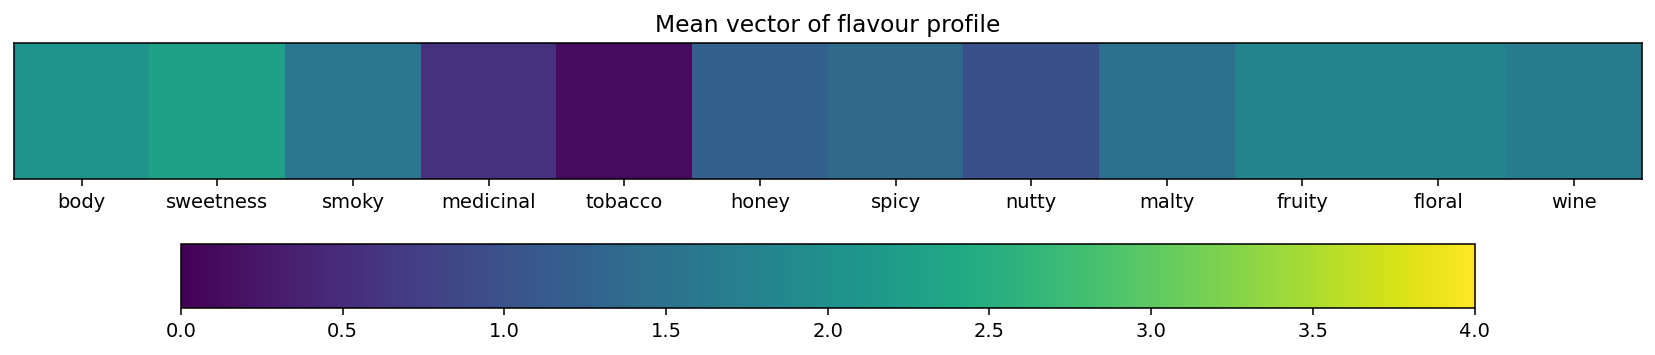

In [47]:
with tick.marks(4):
    ## Show the mean vector as an image strip
    ## Remember: this represents a point in space
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(1,1,1)
    img = ax.imshow(mean_vector[None,:], cmap='viridis', vmin=0, vmax=4)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_xticklabels(columns)
    ax.set_yticks([])
    ax.set_title("Mean vector of flavour profile")
    fig.colorbar(img, orientation='horizontal')

    assert(check_hash(demeaned_whisky, ((86, 12), -12996.960309576743)))
    

**Task B.2** Compute the **covariance matrix** of the *demeaned* data. Call this `whisky_cov`. 

The code below will show you this matrix as an image. **Note**: this should be a 12x12 matrix!

The covariance matrix tells us how different columns of the dataset are correlated (co-vary) with each other.

In [48]:
# YOUR CODE HERE
whisky_cov = np.cov(demeaned_whisky, rowvar=False)
# raise NotImplementedError()

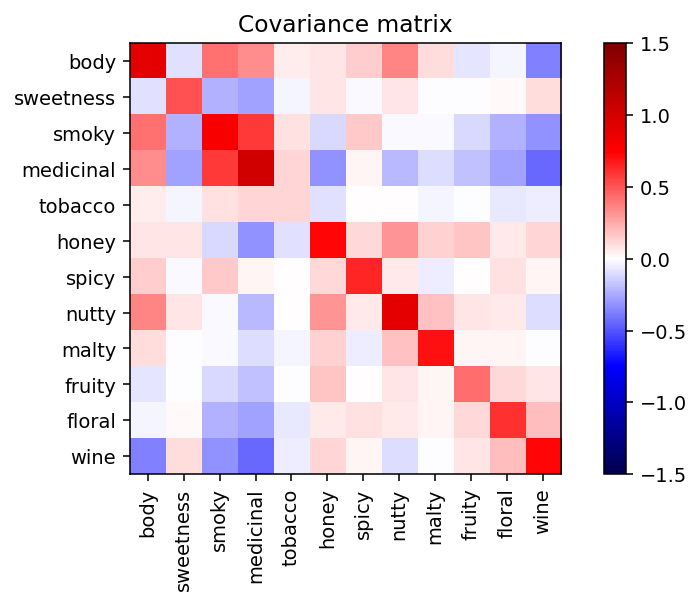

In [49]:
with tick.marks(4):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    img = ax.imshow(whisky_cov, cmap='seismic', vmin=-1.5, vmax=1.5)
    ax.set_xticks(np.arange(12))
    ax.set_yticks(np.arange(12))
    ax.set_yticklabels(columns)
    ax.set_xticklabels(columns, rotation='vertical')
    ax.set_title("Covariance matrix")
    fig.colorbar(img)
    
    assert(check_hash(whisky_cov, ((12, 12), 617.9256928561159)))
    

From the image of the covariance matrix we can see several interesting things:
* having `body` is negatively correlated with the `wine` flavour
* being `smoky` is negatively correlated with having `sweetness`
* `nutty` is positively correlated with `body`

Although the raters have provided 12 different categories, it seems these are not fully independent of each other.

## Eigendecomposition of the covariance matrix

We would like to create some new flavour categories that are independent of each other (so that we don't have categories like smoky and medicinal that are given similar numbers by the tasters). We can do this by combining the existing flavour categories.

By looking at the covariance matrix, we can get an idea of which flavours are most correlated or most independent. Let's analyse this in more detail. Recall that the covariance matrix can be represented by an ellipse whose primary axes are the **eigenvectors** of the covariance matrix. The eigenvectors are a set of *independent* directions in which the dataset varies. 

These are the **principal components** of the dataset. We can compute these from the covariance matrix by taking the eigendecomposition. Each eigenvector of the covariance matrix is a **principal component** and its importance is given by the square root of the absolute value of its corresponding eigenvalue.

Note that a 12 x 12 matrix will be represented by a 12-dimensional ellipsoid, which we can't really visualise, but we can visualise the relative importance of the eigenvectors. 

**Task B.3**
* Compute all 12 of the eigenvectors of the covariance matrix, in order, with the *largest* corresponding eigenvalue first. Store these as a matrix of column vectors in `whisky_pc`. These eigenvectors are the principal components of the whisky data set.
* Compute the square root of every eigenvalue (we can think of these as lengths of the prinicipal components) and store them in `whisky_pc_len`. Make sure they are in descending order from largest to smallest.

In [50]:
# YOUR CODE HERE
# compute eigendecomposition of A
evals, evecs = np.linalg.eig(whisky_cov)

order = np.argsort(-np.abs(evals))

whisky_pc=evecs[:, order]
whisky_pc_len=np.sqrt(evals[order])


# raise NotImplementedError()

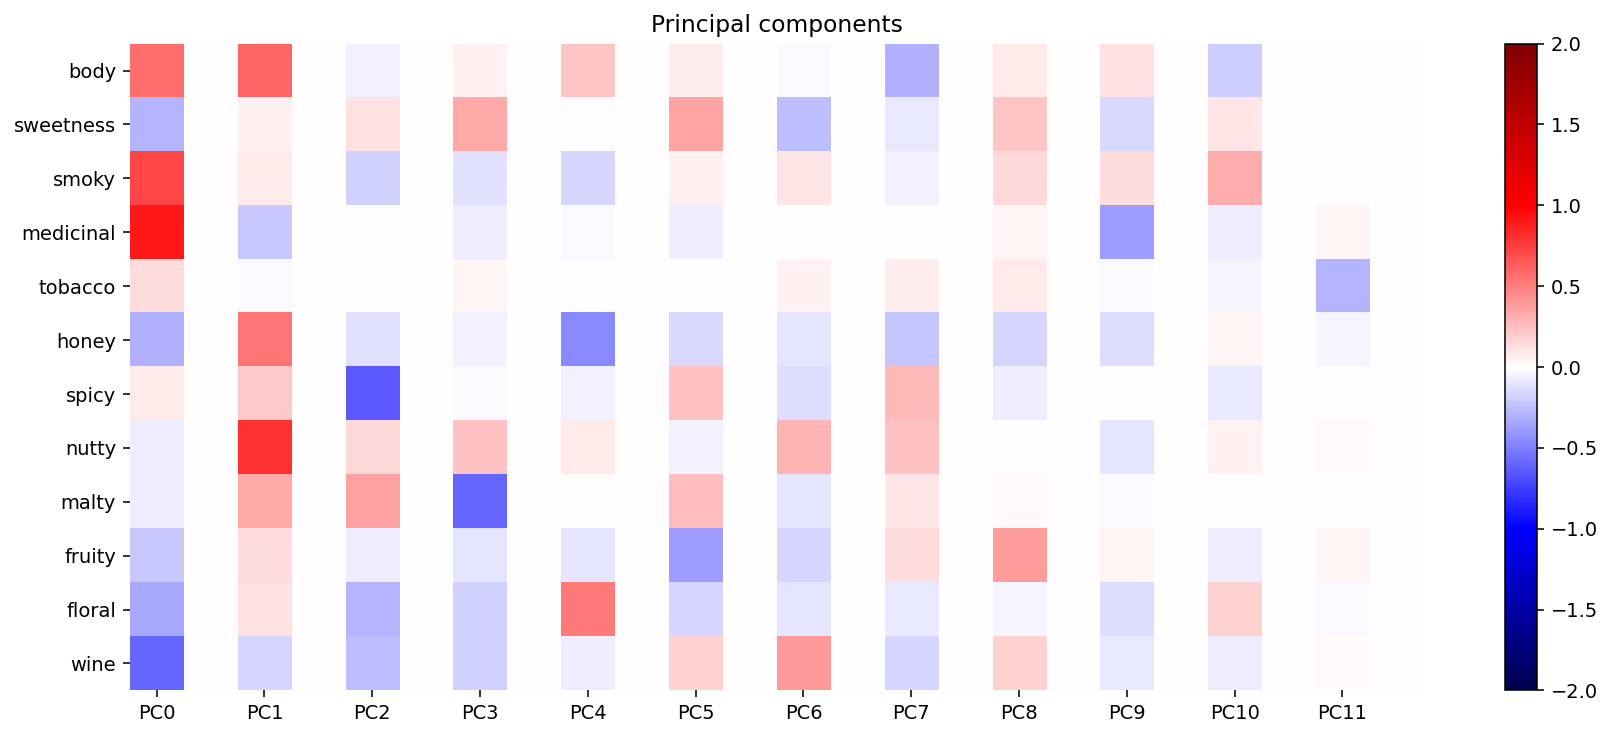

In [51]:
## We can show the principal components as an image
## Each row is a principal component and shows a vector
## which represents the direction of variation. The first
## vector represents the largest component.
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,1,1)
# space out the principal components and scale them by the length of the components
img = ax.imshow(np.concatenate([(whisky_pc * whisky_pc_len), 
                                np.zeros_like(whisky_pc)], axis=0).T.reshape(24, -1).T, 
                cmap='seismic',         
                vmin=-2, vmax=2)

ax.set_yticks(np.arange(12))
ax.set_xticks(np.arange(0,24,2))
ax.set_xticklabels(["PC{i}".format(i=i) for i in np.arange(12)])
ax.set_yticklabels(columns)
ax.set_title("Principal components")
ax.set_frame_on(False)
fig.colorbar(img);

Text(0.5, 1.0, 'Component importances')

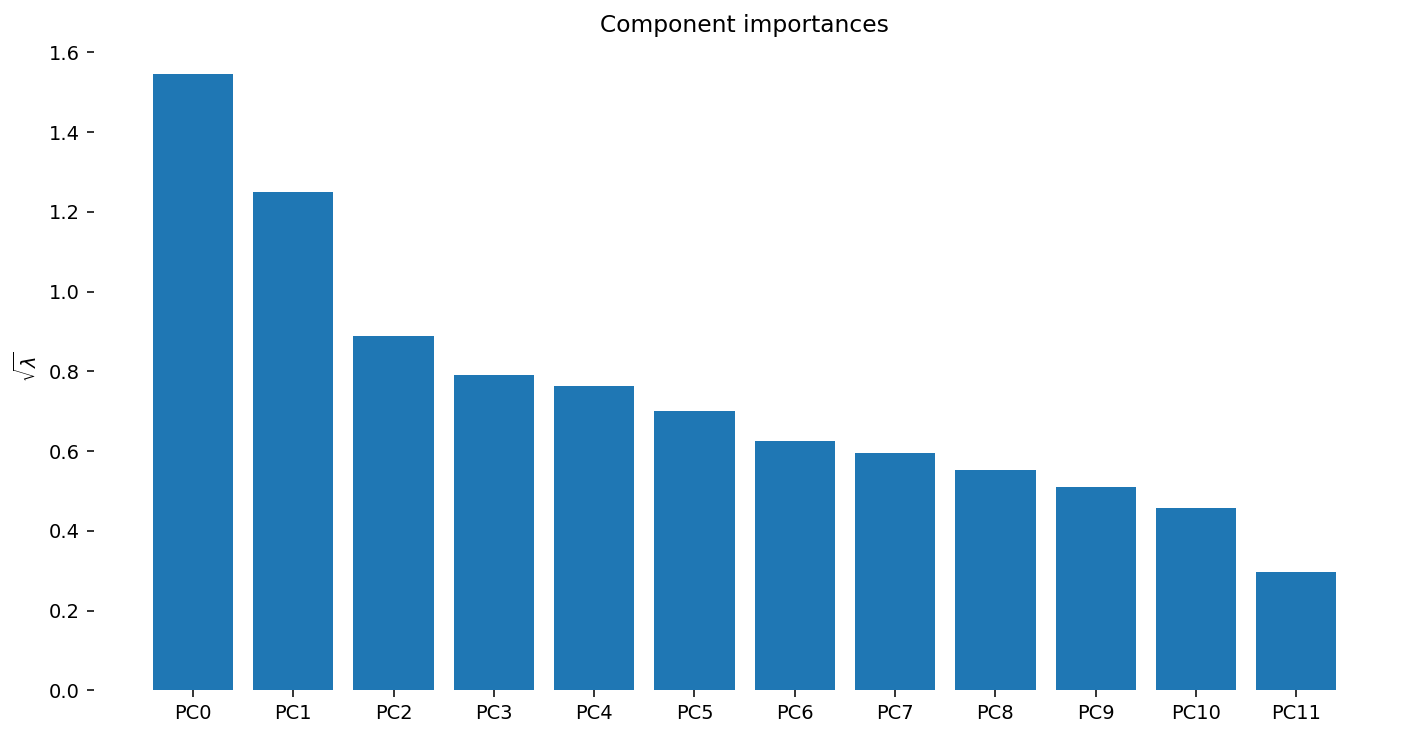

In [52]:
## Show the principal component lengths of this dataset
## This shows how much of the variation in the dataset
## is "explained" by the variation along the corresponding direction.
## In this case, we can see that the first and second components are the largest.
## PC1 is mainly a combination of "smoky", "medicinal" and "body",
## whereas PC2 is mainly a combination of "honey", "nutty", "malty" and "body".
## Further down the list, PC4 is strongly "floral"
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(len(whisky_pc_len)), whisky_pc_len)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(["PC{i}".format(i=i) for i in np.arange(12)])
ax.set_ylabel("$\sqrt{\lambda}$")
ax.set_frame_on(False)
ax.set_title("Component importances")

In [53]:
with tick.marks(10):
    assert(check_hash(whisky_pc, ((12, 12), -116.3856770814677)))
    assert(check_hash(whisky_pc_len, ((12,), 49.2805781587291)))

## Projecting onto the principal components

This is interesting, but quite hard to interpret. One very useful technique is to project data onto a small number of principal components, to visualise the data. This forms a simplified version of the data, where the use of principal components means we can map the directions in the data which are most important to our visual axes. For example, we might map the first two principal components to a 2D $x,y$ plot.

This is a key technique in exploratory data analysis: **principal component analysis**. All it involves is using the principal components to find a simplified mapping onto a lower-dimensional space.

We can compute a projection of a dataset onto an arbitrary set of vectors by forming a matrix product:
$$P = XV,$$

Where $P$ is an $N\times k$ matrix that is the result of the projection, $X$ is the $N \times D$ original data set and $V$ is an $D \times k$ matrix, each of whose *columns* is a vector that we want to project onto.

**Task B.4**
Use this information to project the distillery data onto the first two principal components, and store the result in `flavour_projected_2d`. If you do this correctly, the plot below should show a 2D mapping of whisky flavours, where more distant distilleries in the map represent more distinct flavour styles.




In [54]:
# YOUR CODE HERE
flavour_projected_2d = np.dot(whisky,whisky_pc[:, :2])

# raise NotImplementedError()

In [55]:
flavour_projected_2d.shape

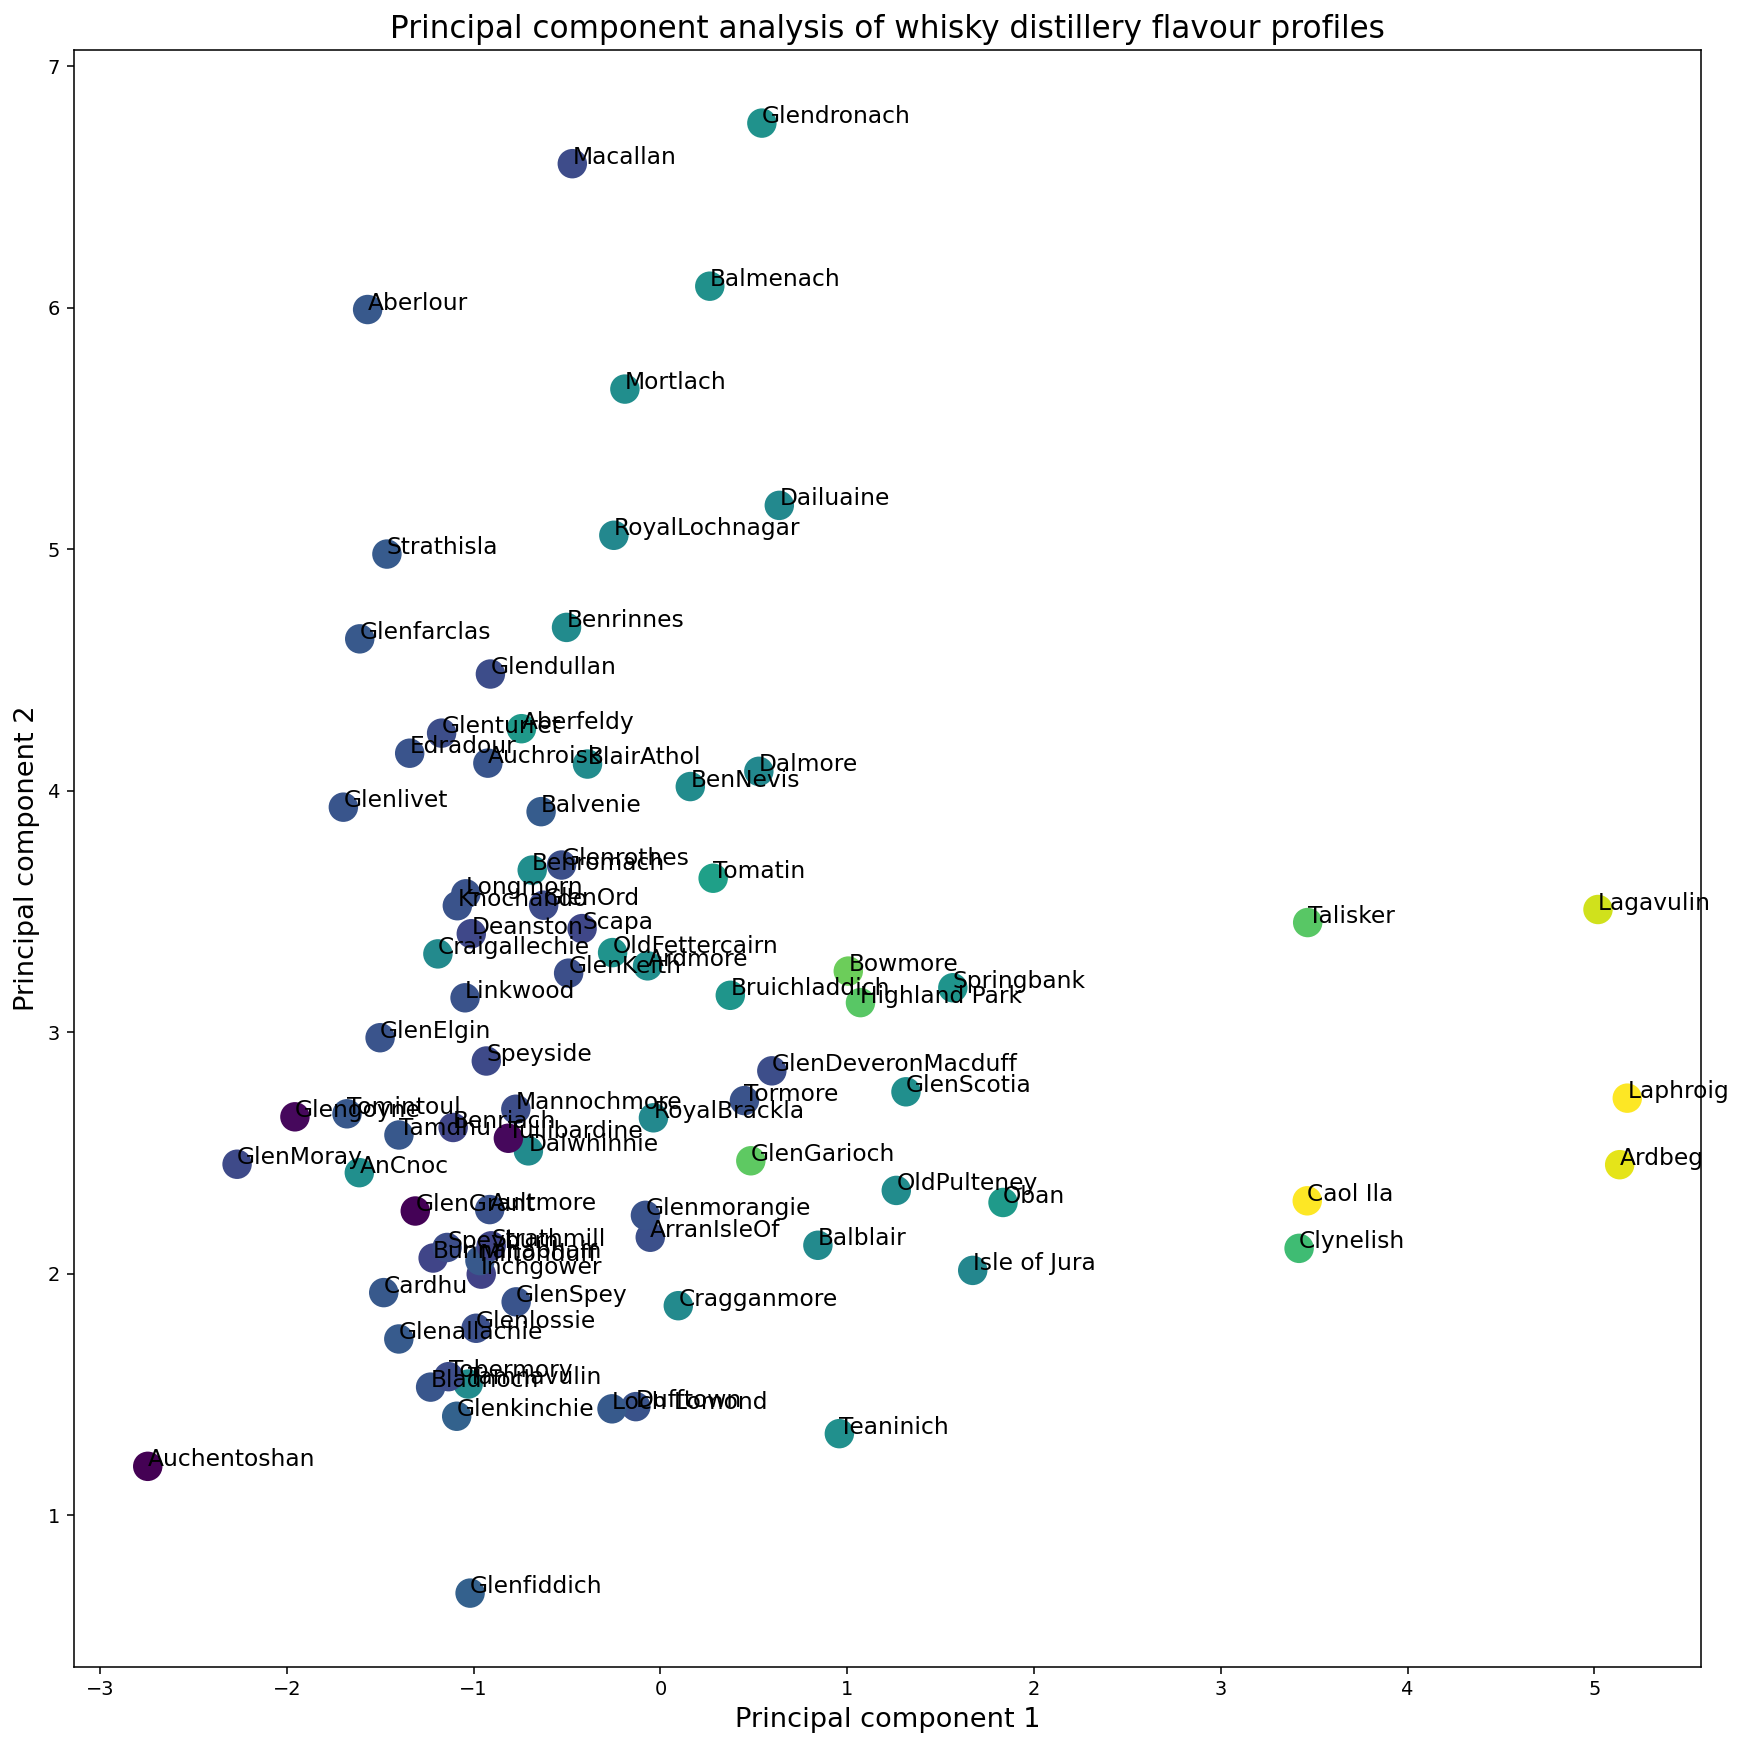

In [56]:
## Show the whisky distilleries laid out
## on the two first principal components,
## colouring the points according to the level of smokiness 
## (just to see that similar whiskies are indeed clustered together)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
#ax.set_frame_on(False)
ax.set_xlabel("Principal component 1", fontsize=14)
ax.set_ylabel("Principal component 2", fontsize=14)
ax.set_title("Principal component analysis of whisky distillery flavour profiles", fontsize=16)
ax.scatter(flavour_projected_2d[:,0], flavour_projected_2d[:,1], c=whisky[:,columns['smoky']], s=200)
#ax.scatter(whisky_projected_2d[:,0], whisky_projected_2d[:,1], c=whisky[:,columns['nutty']], s=40)
for i,name in enumerate(distilleries):
    ax.text(flavour_projected_2d[i,0], flavour_projected_2d[i,1], name, fontdict={'size':12})

In [57]:
with tick.marks(3):
    assert(check_hash(flavour_projected_2d, ((86, 2), 21159.91633246404)))

**Now, repeat this exact process of Principal Component Analysis, but for the *geographic locations* instead of the flavour profiles, and compute `location_projected_2d`.** 

Hint: `location_projected_2d` should have shape (86,2).

In [58]:
# YOUR CODE HERE

# Compute the mean of latitude and longitude
mean_lat = np.mean(locations[:, 0])
mean_lon = np.mean(locations[:, 1])

# Demean the geographic locations
demeaned_locs = locations - np.array([mean_lat, mean_lon])

whisky_loc_cov = np.cov(demeaned_locs,rowvar=False)

evals_locs, evecs_locs=np.linalg.eig(whisky_loc_cov)

order = np.argsort(-np.abs(evals_locs))

whisky_pc_locs=evecs_locs[:, order]

location_projected_2d = np.dot(locations,whisky_pc_locs[:,:2])

# raise NotImplementedError()

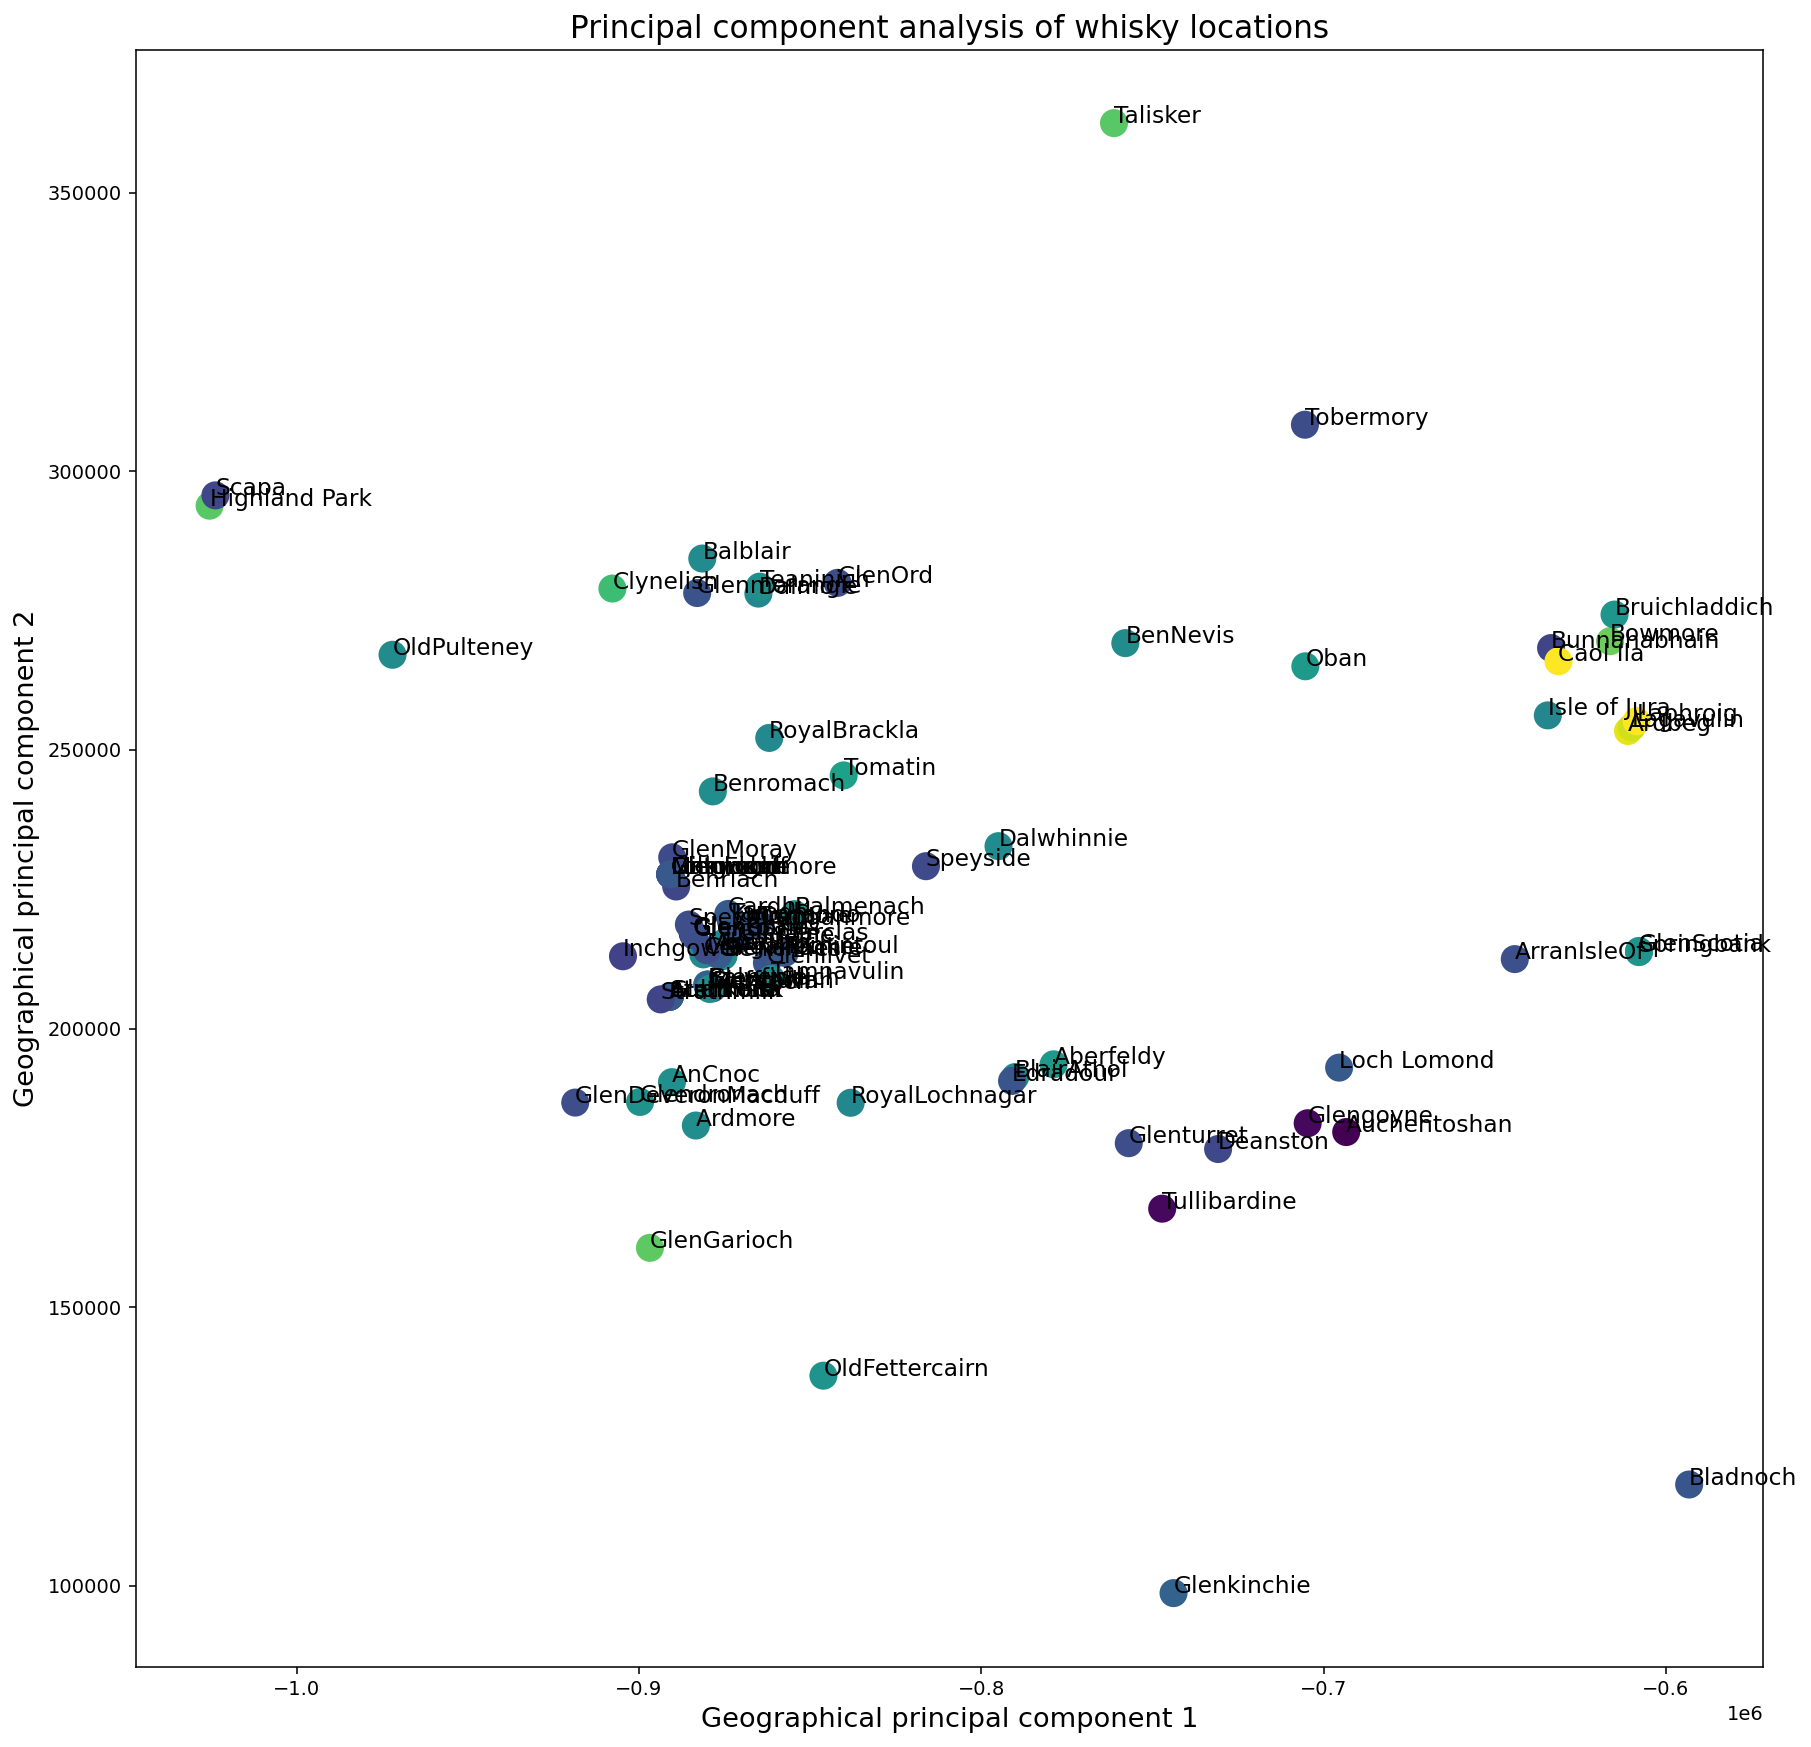

In [59]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
#ax.set_frame_on(False)
ax.set_xlabel("Geographical principal component 1", fontsize=14)
ax.set_ylabel("Geographical principal component 2", fontsize=14)
ax.set_title("Principal component analysis of whisky locations", fontsize=16)
ax.scatter(location_projected_2d[:,0], location_projected_2d[:,1], c=whisky[:,columns['smoky']], s=180)

for i,name in enumerate(distilleries):
    ax.text(location_projected_2d[i,0], location_projected_2d[i,1], name, fontdict={'size':12})

In [60]:
# Sanity check of the size of location_projected_2d; it does not check the values of location_projected_2d. 
# If this fails, so will the hidden test!
with tick.marks(0):
    assert(check_hash(0.0*location_projected_2d, ((86, 2), 0.0)))    

In [61]:
# Hidden test which checks location_projected_2d [9 marks]


We can normalise this data further. Whiten the dataset so that it has zero mean and unit covariance. This transforms our dataset so that it is centered on the origin (demeaning) and "spherical" (whitenening with covariance matrix). This is particularly useful if we are going to try and map from data in one vector space to another; having the data in standard scaling, with no offset and no correlation among dimensions makes the data easier to work with.

**Task B.5**
Use the SVD to compute the inverse square root of the covariance matrix `whisky_cov`. Multiply the demeaned whisky matrix by this to produce `whitened_whisky`. This represents the data with the mean removed and all correlations eliminated.



In [62]:
# YOUR CODE HERE

U, S, Vt = np.linalg.svd(whisky_cov)
S_invsqrt = np.diag(1 / np.sqrt(S))
whiten_mtx = np.dot(U, np.dot(S_invsqrt, U.T))

whitened_whisky = np.dot(demeaned_whisky, whiten_mtx)


# raise NotImplementedError()

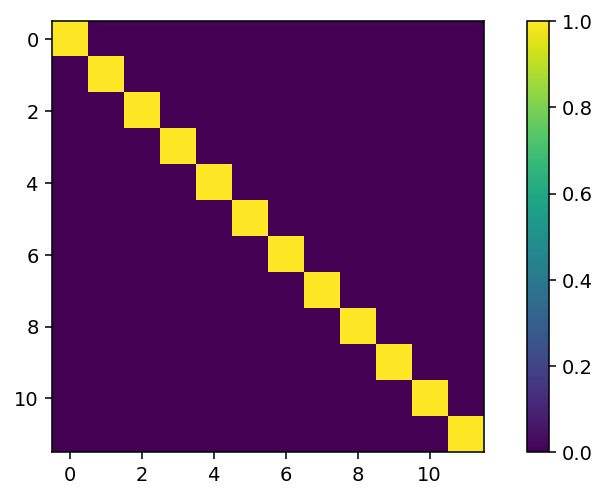

In [63]:
# This plot of the covariance matrix should now be perfectly diagonal

with tick.marks(2):
    plt.imshow(np.cov(whitened_whisky.T), vmin=0, vmax=1, cmap='viridis')
    plt.colorbar()

    assert(check_hash(whitened_whisky, ((86, 12), -13840.852324929752)))

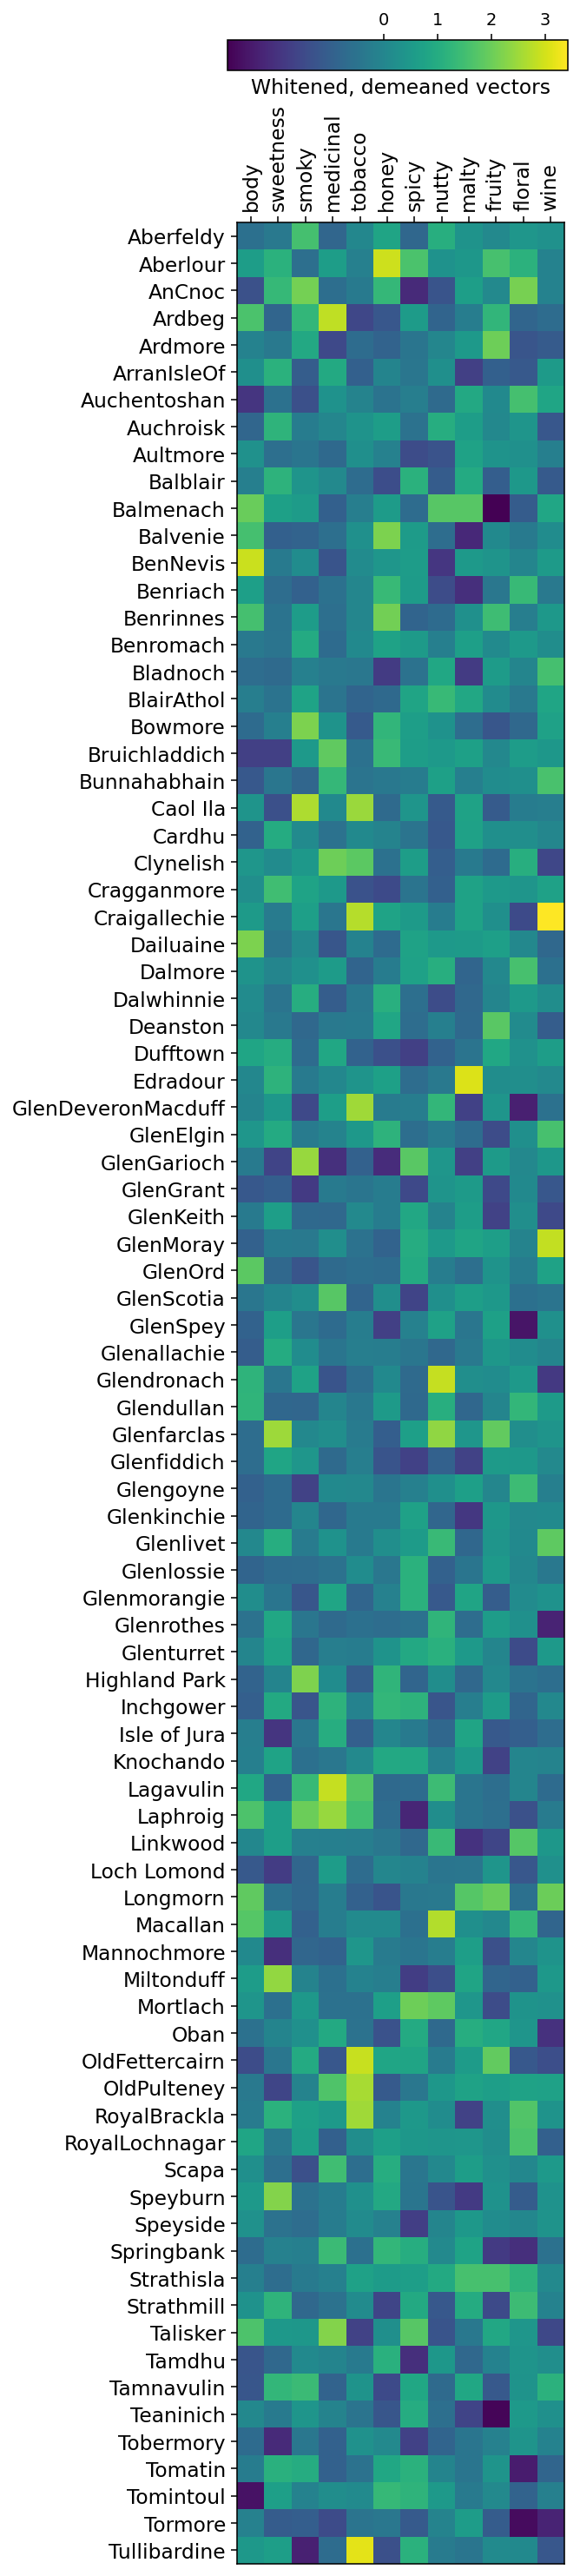

In [64]:
# show a plot of the whisky data
fig = plt.figure(figsize=(10,25))
ax = fig.add_subplot(1,1,1)
ax.set_title("Whitened, demeaned vectors")
# image plot
img = ax.imshow(whitened_whisky)
ax.set_yticks(np.arange(len(distilleries)))
ax.set_yticklabels(distilleries, rotation="horizontal", fontsize=12)

# put the x axis at the top
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)

# some horrific colorbar hackery to put in the right place
# don't worry about this bit!
cbaxes = fig.add_axes([0.37, 0.93, 0.28, 0.01])  
fig.colorbar(img, orientation='horizontal',  cax=cbaxes, ticks=np.arange(5))
cbaxes.xaxis.tick_top()

### Visualising in normalised space
Now that we have the data normalised, we could also define a more sensible way to compare vectors in a high-dimensional space. The $L_2$ norm has significant problems in very high-dimensional spaces. A more sensible way to compare high-dimensional vectors is to look at the *angle* between them.

**Task B.6**
Define a function `cosine(a, b)` that computes the cosine of the angle between two vectors `a` and `b`. 

N.B. This should be a value between -1 and 1.

In [65]:
def cosine(a, b):
    #cosine is the dotproduct divided by the product of L2norms

    dot_prod = np.dot(a,b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_prod/(norm_a*norm_b)

    # YOUR CODE HERE
    # raise NotImplementedError()

In [66]:
with tick.marks(2):
    angles = np.array([cosine(whitened_whisky[i,:], whitened_whisky[j,:]) for i in range(len(whisky)) for j in range(len(whisky))])
    assert(check_hash(angles, ((7396,), 25457.146694199713)))

## A 3D visualisation
We can use the cosine distances to show a different layout of whiskies; this time in terms of relative angles to two reference distillieries, in the whitened space. This has the advantage that all distances are normalised to the range [-1,1], and we have a good spread of points in the space. The plot below shows the angle with respect to 3 distilleries, as a 3D plot. You can compare with the plot using the unwhitened data to see the effect that normalisation has had, if you wish.

This is also an example of why visualising data in 3D is usually a bad idea.

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection='3d')

## Modify these to plot the flavours on different axes
ref_a = 'Glengoyne'
ref_b = 'Laphroig'
ref_c = 'Glenlivet'

## get the respective flavour vectors
reference_a = whitened_whisky[distilleries.searchsorted(ref_a)]
reference_b = whitened_whisky[distilleries.searchsorted(ref_b)]
reference_c = whitened_whisky[distilleries.searchsorted(ref_c)]

for name, flavour in zip(distilleries, whitened_whisky):
    ## compute angles to the references
    angle_a = cosine(reference_a, flavour)
    angle_b = cosine(reference_b, flavour)
    angle_c = cosine(reference_c, flavour)

    ax.scatter(angle_a, angle_b, angle_c, color='c', s=5)
    ax.text(angle_a, angle_b, angle_c, name, fontdict={"size":4}, alpha=0.5)
    
## fix up the plot
ax.set_xlabel("Angle with respect to {ref_a}".format(ref_a=ref_a))
ax.set_ylabel("Angle with respect to {ref_b}".format(ref_b=ref_b))
ax.set_zlabel("Angle with respect to {ref_c}".format(ref_c=ref_c))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)
ax.set_title("Normalised flavour angles between whisky distilleries")

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'Normalised flavour angles between whisky distilleries')

---

## C: A new competitor...? 

Consider the following problem: A newly founded distillery aims to produce a whisky similar to "Laphroig" but would like 1 points more "sweetness", 0.9 points less "medicinal" and 0.5 points less on the "smoky" scale - otherwise, they are happy with the Laphroig flavor profile.

Is it possible for the distillery to produce this whisky given their current production system has limited production capabilities (modeled as a *linear system*)?


**Task C.1**
- Extract the flavour profile for Laphroig from `demeaned_whisky` and store it in `demeaned_laphroig`
- Compute the new target flavour profile (based on the `demeaned_laphroig`) the new distillery is aiming for; store it in `demeaned_desired_flavour`


In [68]:
# YOUR CODE HERE

demeaned_laphroig = demeaned_whisky[distilleries.searchsorted("Laphroig")]
sweetness_index = columns['sweetness']
medicinal_index = columns['medicinal']
smoky_index = columns['smoky']

# Create an array with the desired changes in sweetness, medicinal, and smoky scales
desired_changes = np.zeros(12) # Initialize with zeros for all 12 flavor categories
desired_changes[sweetness_index] = 1
desired_changes[medicinal_index] = -0.9
desired_changes[smoky_index] = -0.5

demeaned_desired_flavour = demeaned_laphroig + desired_changes
# raise NotImplementedError()

In [69]:
# Extract the indices for sweetness, medicinal, and smoky scales from the columns mapping
sweetness_index = columns['sweetness']
medicinal_index = columns['medicinal']
smoky_index = columns['smoky']

# Extract the demeaned flavor profile for Laphroig
demeaned_laphroig = demeaned_whisky[distilleries.searchsorted('Laphroig')]

# Define the desired changes in sweetness, medicinal, and smoky scales
sweetness_change = 1
medicinal_change = -0.9
smoky_change = -0.5

# Create an array with the desired changes in sweetness, medicinal, and smoky scales
desired_changes = np.zeros(12)  # Initialize with zeros for all 12 flavor categories
desired_changes[sweetness_index] = sweetness_change
desired_changes[medicinal_index] = medicinal_change
desired_changes[smoky_index] = smoky_change

# Create the new target flavor profile based on the desired changes
demeaned_desired_flavour = demeaned_laphroig + desired_changes


In [70]:
with tick.marks(2):
    assert(check_hash(demeaned_laphroig, ((12,), -38.84869552975986)))

In [71]:
with tick.marks(2):
    assert(check_hash(demeaned_desired_flavour, ((12,), -42.96584690556192)))

**Task C.2**

The new distillery has a new but simple production facility and only limited access to quality ingredients (specific malt types), which limits their flexibility. They only have five specific parameters they can easily control, such as the age of the barrels in which they age the whiskey and certain pressure and temperature settings during the distillation and aging. In total, they have five such (continuous) parameters, which we can **conveniently** collect in a vector $\mathbf{x}\in\mathbb{R}^5$; each parameter has a unique effect on the resulting flavor.

We also happen to know a set of equations govering the input-output relationship of the current Whisky distillery. When we  produce our Whisky with a certain $\mathbf{x}$ as input, we know the result of the distillation in terms of the flavors. The input-output relations are given by the follwing equations:

$$\begin{gathered}
  {y_1} = 1.01 {x_1}{\text{  + }}{x_2}{\text{  +  }}{x_5}{\text{ }} \hfill \\
  -2{x_1}+{y_2} = 0.02{x_2}{\text{  + }}{x_3}{\text{ }} - {x_4}{\text{ +  }}{x_5}{\text{ }} \hfill \\
  {y_3} =  - 2{x_1}{\text{  + }}{x_2}{\text{ +  }}1.03{x_3}{\text{  + }}{x_4}{\text{ }} - {x_5} \hfill \\
  {y_4} = {x_1}{\text{ }} + {x_2}{\text{  + }}{x_3}{\text{ }} - 2.04{x_4}{\text{  }} \hfill \\
  {y_5} =  - 0.005{x_5}{\text{ }} \hfill \\
  {y_6} =  - {x_1}{\text{  +  }}{x_2}{\text{ }} - 2{x_3}{\text{ +  }}{x_5} \hfill \\
  -{x_2}{\text{ -  }}{x_3}{\text{ }}+ {y_7} = 0 \hfill \\
  {y_8} = {x_2}{\text{ }} - {x_3}{\text{  +  }}2.05{x_5} \hfill \\
  {y_9} = 4{x_1}{\text{  + }}{x_2} - {x_3}{\text{ }} - 1.04{x_4}{\text{ }} - {x_5} \hfill \\
  {y_{10}} = 3{x_1}{\text{ }} - {x_2}{\text{ }} - 0.03{x_3} \hfill \\
  {y_{11}} =  - {x_1}{\text{  + }}1.02{x_2}{\text{ }} - 3{x_3} \hfill \\
  {y_{12}} = 3.01{x_1}{\text{  + }}2{x_2}{\text{  +  }}{x_3}{\text{  +  }}{x_4}{\text{  + }}2.05{x_5} \hfill \\ 
\end{gathered} $$

Where $\mathbf{x}=[x_1,x_2,...,x_{5}]$ are the parameters and $\mathbf{y}=[y_1,y_2,...,y_{12}]$ is the desired flavor profile. For example, if we know the value of the system parameters $x_1$ and $x_2$ and $x_5$ we know what the "body" of the Whisky will be once it has finished aging and has been bottled.

In short, when we apply the set of equations to our process parameters vector, $\mathbf{x}$, we know the resulting flavour. This is a *system of linear equations* (or just a *linear system*) which can be written $A\mathbf{x} = \mathbf{y}$ where $\mathbf{y}$ is the vector stored in `demeaned_desired_flavour` and $\mathbf{x}$ is the vector of parameters we need to produce a whisky with a certain flavour profile.



From the set of coupled equations above, identify $A$ and create a $12 \times 5$ matrix, and store it in a numpy array called `A_whisky_process` . This is a manual and tedious task but important to understand! It should have values such that we can apply it to $\mathbf{x}$ and get $\mathbf{y}$, i.e., $A\mathbf{x} = \mathbf{y}$ where $\mathbf{y}$ is the vector `demeaned_desired_flavour`. You should not be applying any manual solving techniques to $A$ and $\mathbf{y}$ but simply inspect the individual equations and identify the correct values of the corresponding row in $A$.

In [72]:
# equations can be written as 


# y1 = 1.01x1 + x2 + x5
# y2 = 2x1 + 0.02x2 + x3 -x4 +x5
# У3 = -2x1 + x2 + 1.03x3 + x4 - X5
# У4 = x1 + x2 + X3 - 2.04x4
# У5 = -0.005x5
# У6 = -x1 + x2 - 2x3 + x5
# y7 = x2 + x3
# У8 = X2 - x3 + 2.05x5
# y9 = 4x1 + x2 - x3 - 1.04x4 - X5
# У10 = 3х1 - x2 - 0.03хз
# y11 = -x1 + 1.02x2 - 3х3
# У12 = 3.01x1 + 2x2 + x3 + x4 + 2.05x5

#using matrix method of solving linear equations

#where A is the matrix of coordinates and x is the matrix of unknown variables (x1,x2,x3....x5) and y is the RHS

In [73]:
# YOUR CODE HERE
# Coefficients matrix A
A_whisky_process = np.array([
    [1.01, 1, 0, 0, 1],
    [2, 0.02, 1, -1, 1],
    [-2, 1, 1.03, 1, -1],
    [1, 1, 1, -2.04, 0],
    [0, 0, 0, 0, -0.005],
    [-1, 1, -2, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 1, -1, 0, 2.05],
    [4, 1, -1, -1.04, -1],
    [3, -1, -0.03, 0, 0],
    [-1, 1.02, -3, 0, 0],
    [3.01, 2, 1, 1, 2.05]
])

# Solve the linear system
#find Ainverse

A_whisky_process_inv = np.linalg.pinv(A_whisky_process)

# Resulting parameters vector
x = np.dot(A_whisky_process_inv,demeaned_desired_flavour)

# raise NotImplementedError()

In [74]:
x.shape


In [75]:
## Sanity check - size of A_whisky_process (0 marks)
with tick.marks(0): # a better test/hash
    assert(check_hash( 0*A_whisky_process , ((12, 5), 0)))

In [76]:
## Visible, autograded assesment (advanced hash - WARNING: does not check the correct size of A_whisky_process)
with tick.marks(5): # ADVANCED HASH; DOES NOT CHECK FOR CORRECT SIZE OF A_whisky_process
    assert(check_hash( A_whisky_process @ (np.linspace(1,2515.337,12*5)).reshape((5,12)), ((12, 12), 14089780.468302336)))

**Task C.3**

We now look to find the set of ingredients and process parameters (i.e. $\mathbf{x})$ that will hopefully result in the new distillery being able to produce the new flavour.

$A$ is asymmetrical and this problem does not have an exact solution. We can however use the pseudo-inverse to give the closest result according to the L2 norm. In other words, it will find the vector $\mathbf{\hat x}$ that minimises the distance $\left\| {A\mathbf{\hat x}−\mathbf{y}} \right\|_2$:

- use `np.linalg.pinv` to compute an estimate the of process parameters, $\mathbf{\hat x}$, such that $A \mathbf{\hat x}\approx \mathbf{y}$ you'll need to use to produce the Whisky with the desired flavour (see the lecture notes on the pseudo inverse). Store the result in `xhat` with shape `(5,)`.
- compute the actual flavour resulting from using the process parameters, $ \mathbf{\hat x}$, and store it in `demeaned_actual_flavour` (only for visualisation).
- compute the L2 norm of the difference vector between the actual and desired flavour vector and store it in `error_l2` as a scalar.


In [77]:
# YOUR CODE HERE


xhat = np.dot(A_whisky_process_inv, demeaned_desired_flavour)

# Compute the actual flavour resulting from xhat
demeaned_actual_flavour = np.dot(A_whisky_process, xhat)

error_l2 = np.linalg.norm(demeaned_actual_flavour - demeaned_desired_flavour)

# Print the results
print("= (xhat):", xhat)
print("Norm of Error Vector:", error_l2)

# raise NotImplementedError()

= (xhat): [-0.29307698  0.19513845  0.62244037 -0.84041953 -0.07562146]
Norm of Error Vector: 3.838013763128829


In [78]:
## Show the demeaned_glengoyne vector as an image strip
## Remember: this represents a point in space
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(demeaned_laphroig[None,:], cmap='viridis', vmin=0, vmax=4)
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticks([])
ax.set_title("Laphroig")
fig.colorbar(img, orientation='horizontal')

## Show the demeaned_desired_flavour vector as an image strip
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(demeaned_desired_flavour[None,:], cmap='viridis', vmin=0, vmax=4)
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticks([])
ax.set_title("Desired flavour profile")
fig.colorbar(img, orientation='horizontal')

## Show the demeaned_actual_flavour vector as an image strip
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(demeaned_actual_flavour[None,:], cmap='viridis', vmin=0, vmax=4)
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticks([])
ax.set_title("Actual/possible flavour profile")
fig.colorbar(img, orientation='horizontal')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
## Sanity check - size of xhat (0 marks)
with tick.marks(0): 
    assert(check_hash( 0*xhat , ((5,), 0)))

In [80]:
## Hidden, autograded assesment of xhat (4 marks)


In [81]:
## Sanity check - size of error_l2 (0 marks)
with tick.marks(0): 
    assert(check_hash( 0*error_l2 , ((), 0)))

In [82]:
## Hidden, autograded assesment of the error_l2 variable (2 marks)



We can now (hopefully) answer the question whether the newly founded distillery is currently able to produce a Whisky with the desired flavor profile - or should they perhaps look to improve their production facilities (or choose a different business entirely)...?


---

# Submission on Moodle


We will generate the **one** pdf file you'll need to submit along with the notebook:

*Note*: you do not need to worry about the formatting etc (that's predetermined); just make sure all your explanations are readable in the pdf and you'll be fine!


In [83]:
## Report generation - YOU MUST YOU RUN THIS CELL !
#
# Ignore warnings regarding fonts
#

from matplotlib.backends.backend_pdf import PdfPages

# File 1: declaration of originality with system info
try:
    f = open('uofg_declaration_of_originality.txt','r')
    uofg_declaration_of_originality = f.read()
except: 
    uofg_declaration_of_originality = "uofg_declaration_of_originality not present in cwd"

try:
    student_id.lower()
except: 
    student_id="NORESPONSE"
try:
    student_typewritten_signature.lower()
except: 
    student_typewritten_signature="NORESPONSE"

fn = ("idss_lab1_complinalg_%s_declaration.pdf" % (student_id.lower()))
fig_dec = plt.figure(figsize=(10, 12)) 
fig_dec.text(0.1,0.1,("%s\n\n Student Id %s\n\n Typewritten signature: %s\n\n UUID System: %s" % (uofg_declaration_of_originality,student_id, student_typewritten_signature, uuid_system)))
 
# Combined: 
fn = ("idss_lab1_complinalg_%s_combined_v20222023a.pdf" % (student_id))
pp = PdfPages(fn)
pp.savefig(fig_dec)
pp.close()

with tick.marks(0):  # have you generated the combied file...? you don't actually get any credit for this just confirmation that the file has been generated
    assert(os.path.exists(fn))


<IPython.core.display.Javascript object>

**You must (for full or partial marks) submit via Moodle:**

- this notebook (completed) after "Restart and rerun all":
    - `idss_lab1_complinalg_v20232024a.ipynb`
    
- the pdf (autogenerated):
     - `idss_lab1_complinalg_[YOUR STUDENT ID]_combined_v20232024a.pdf`)

# Appendix: Marking Summary (and other metadata)
#### - make sure that the notebook runs without errors (remove/resolve the `raise NotImplementedError()`) and "Restart and Rerun All" cells to get a correct indication of your marks.

In [84]:

print("Marks total : ","100")
print("Marks visible (with feedback): ","57")
print("Marks hidden (without feedback): ","43")
print("Marks autograded (hidden+visible): ","100")
print("\nThe fraction below displays your performance on the autograded part of the lab that is visible with feedback (only valid after `Restart and Run all`:")
tick.summarise_marks() # 

print("- the autograded (and visible) marks account for at least 50% of the total lab assesment.")

Marks total :  100
Marks visible (with feedback):  57
Marks hidden (without feedback):  43
Marks autograded (hidden+visible):  100

The fraction below displays your performance on the autograded part of the lab that is visible with feedback (only valid after `Restart and Run all`:


- the autograded (and visible) marks account for at least 50% of the total lab assesment.
